# __Part A: Generative Adversarial Networks__

<a class="anchor" id="1"></a>
## <font color='#71a1e3'> __Problem Understanding__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


<a class="anchor" id="1"></a>
## <font color='#71a1e3'> __Import Libraries__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


In [ ]:
!pip install -q keras-tuner pandas matplotlib seaborn scikit-learn tqdm tensorflow_addons scikit-image

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### Other Imports

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report, accuracy_score

import os, time, math, datetime, warnings, pytz, glob
from IPython.display import display
from functools import reduce
import absl.logging
from tqdm import tqdm
import logging
from scipy.linalg import sqrtm
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

absl.logging.set_verbosity(absl.logging.ERROR)
logging.getLogger('tensorflow').disabled = True
warnings.filterwarnings('ignore')

### Tensorflow Import

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow import expand_dims
from tensorflow.keras import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras import backend as K
from tensorflow.image import random_flip_left_right, random_crop, resize_with_crop_or_pad
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (Embedding, Dense, Input, InputLayer, Normalization, Flatten,BatchNormalization,
    Dropout,Conv2D, GlobalAveragePooling2D, MaxPooling2D, ReLU, Layer,Activation, Multiply, AveragePooling2D,
    Add, RandomRotation,Resizing, Rescaling, Reshape, Concatenate, concatenate, Lambda,LeakyReLU)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, TerminateOnNaN, TensorBoard, CSVLogger, Callback
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Adagrad, Adamax
from tensorflow.keras.regularizers import l2, L2
from tensorflow.keras.optimizers.schedules import *
from tensorflow.keras.metrics import FalseNegatives, categorical_crossentropy, sparse_categorical_crossentropy,BinaryCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import *
from tensorflow_addons.optimizers import SWA
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import pairwise_kernels
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import PReLU,Dense, GlobalAveragePooling2D, Input, Conv2DTranspose
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import RandomNormal
from tensorflow_addons.layers import SpectralNormalization
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

from tensorflow.keras.datasets import cifar10
from kerastuner.tuners import Hyperband
from kerastuner import HyperModel
# Setting a seaborn style
sns.set(style="whitegrid")







### Set the seed of this notebook

In [ ]:
seed = 32
tf.random.set_seed(seed)
np.random.seed(seed)

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Check for GPU__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is check the available GPUs and set the memory growth

<a class="anchor" id="1"></a>
## <font color='#71a1e3'> __Problem Understanding__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


### __What is GAN?__

Gan represnts Generative Adversarial Networks which is all about creating here. Generally it is harder compared to other deep learning fields.

The main focus of GAN is to generate data be it images or videos or music from scratch and generally what does GAN consist of?

GAN are algorithic architectures that uses 2 neural networks, putting one against the other. This is to generate new, synthetic instances of data that can be pass as real data.

Generally, widely use in image generation, voice generation etc. 

GAN also work with competition of two different parts

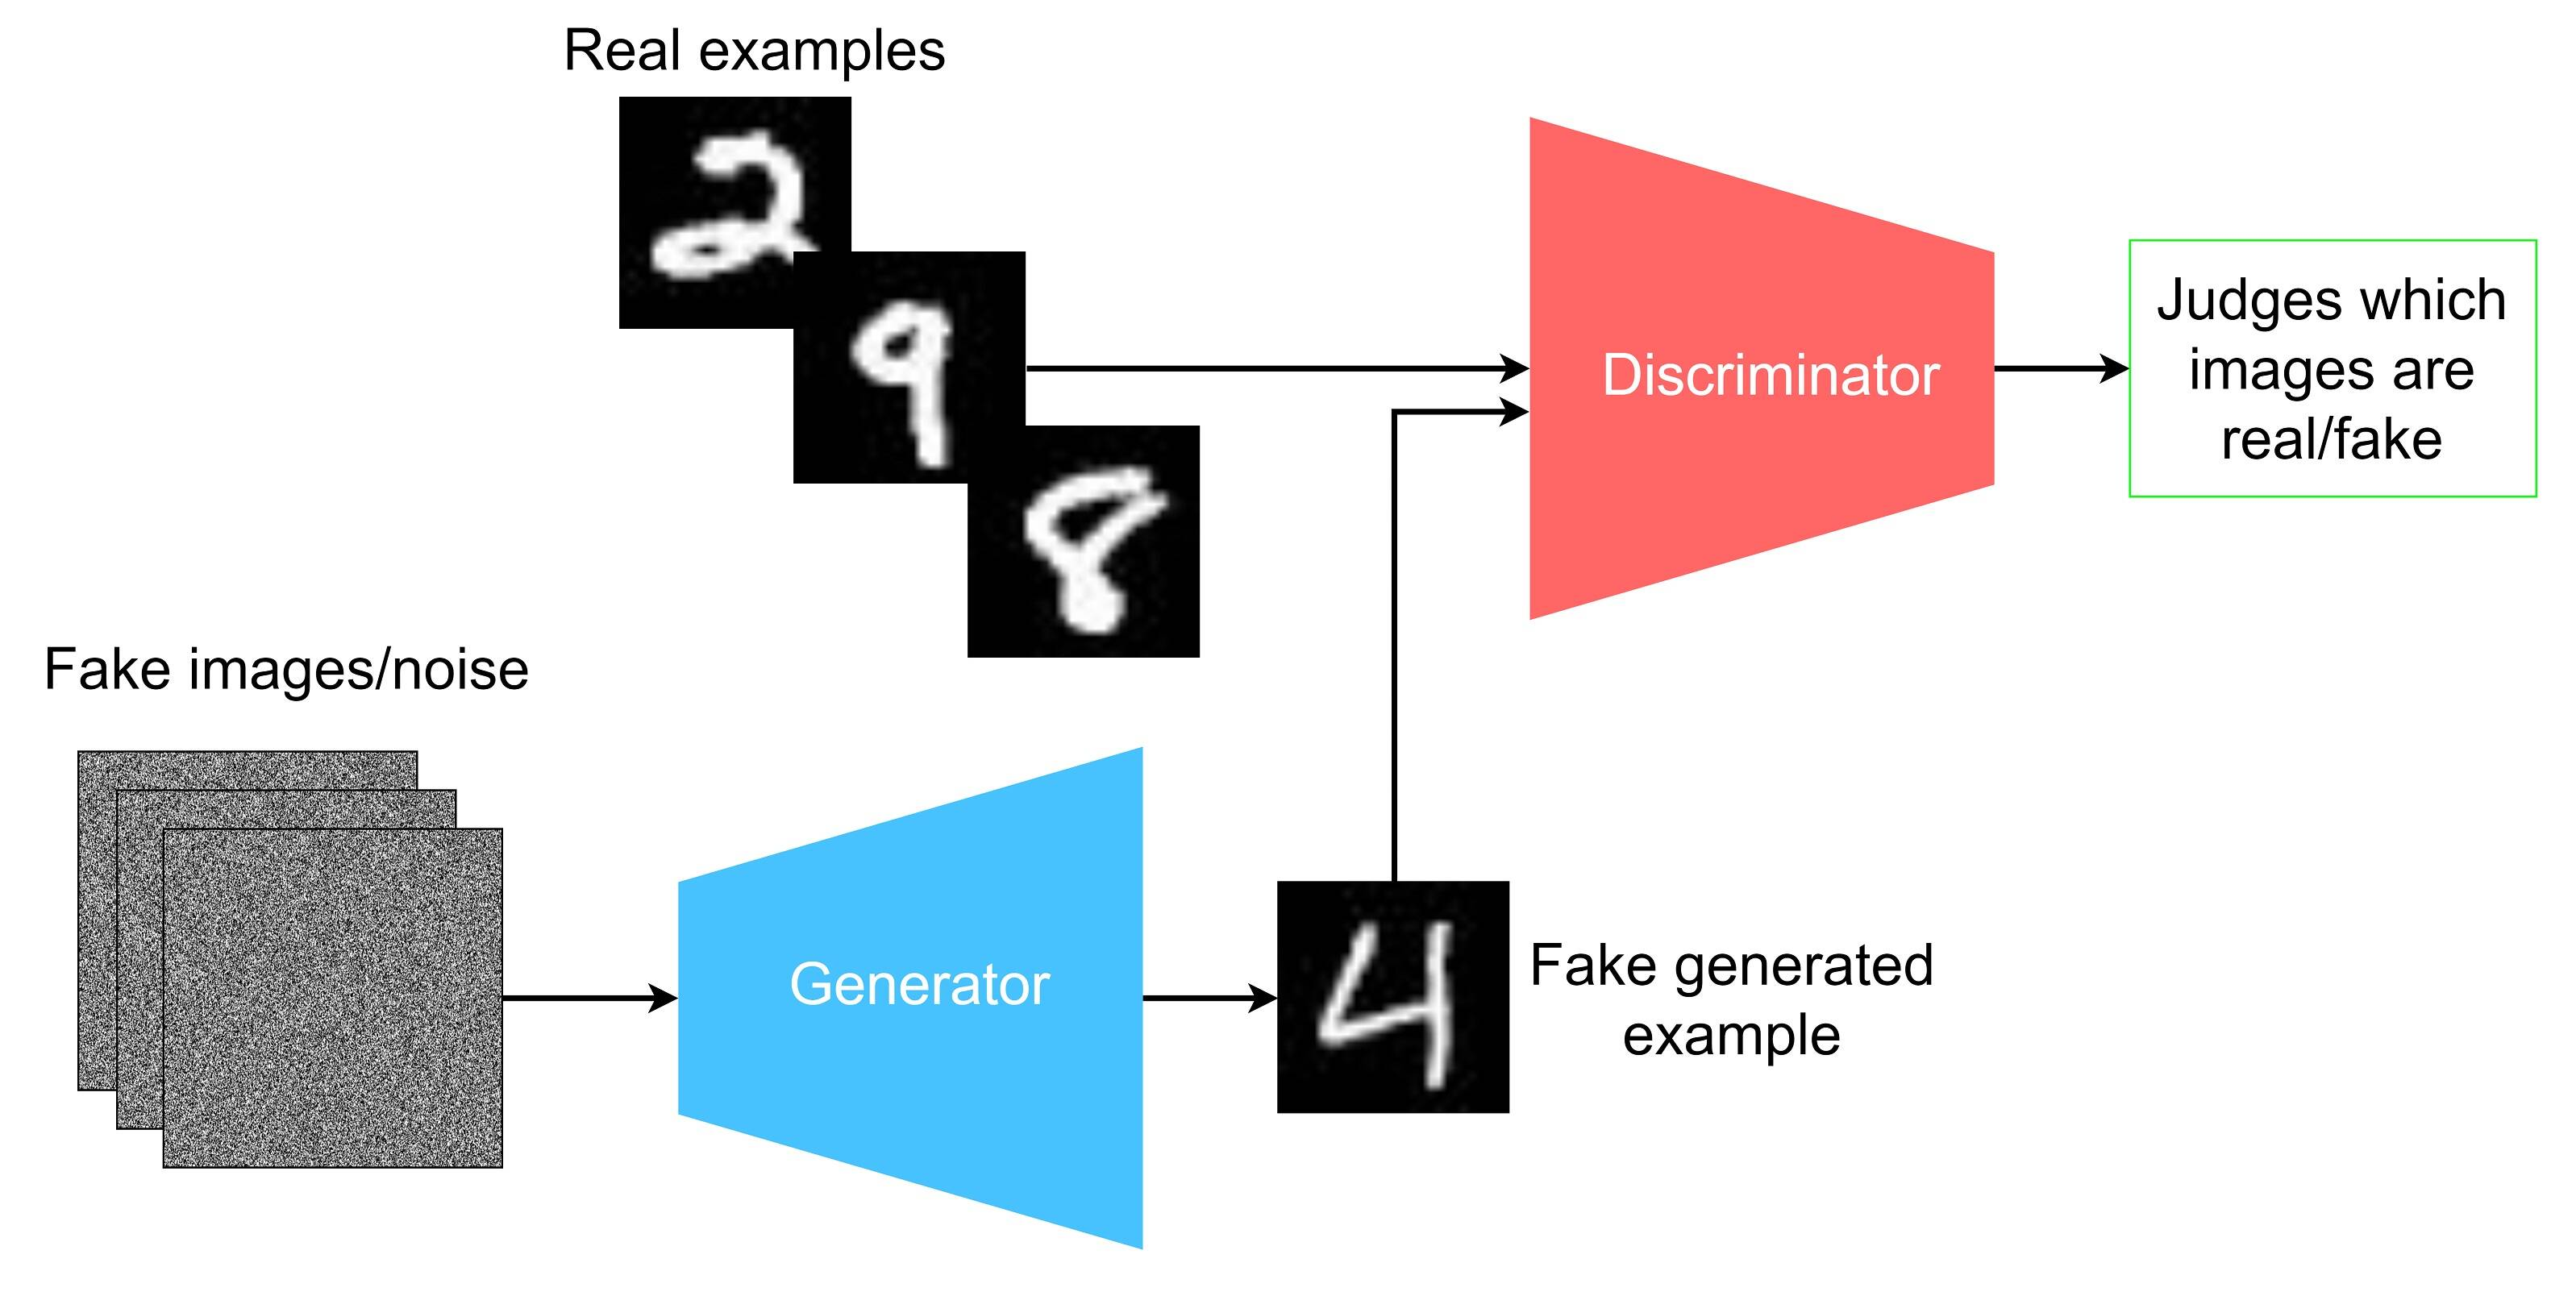

__Generator__
1. For this, you can input random images, known as random noise. This random images can be anything.
2. Through the generator, it will generate a sample that hopefully ends up like the real dataset if the generator and discrimintor and discriminator both are trained good enough
3. Output is sometimes refered to as latent space or a latent vector

What can we do to optimise?
1. Output must be pass through the generator through the discriminator, which then backpropagate and calculate the erros both the generator and discriminator 
2. Gan is also a form of decovolution and parameters, such as stride, padding, kernel size

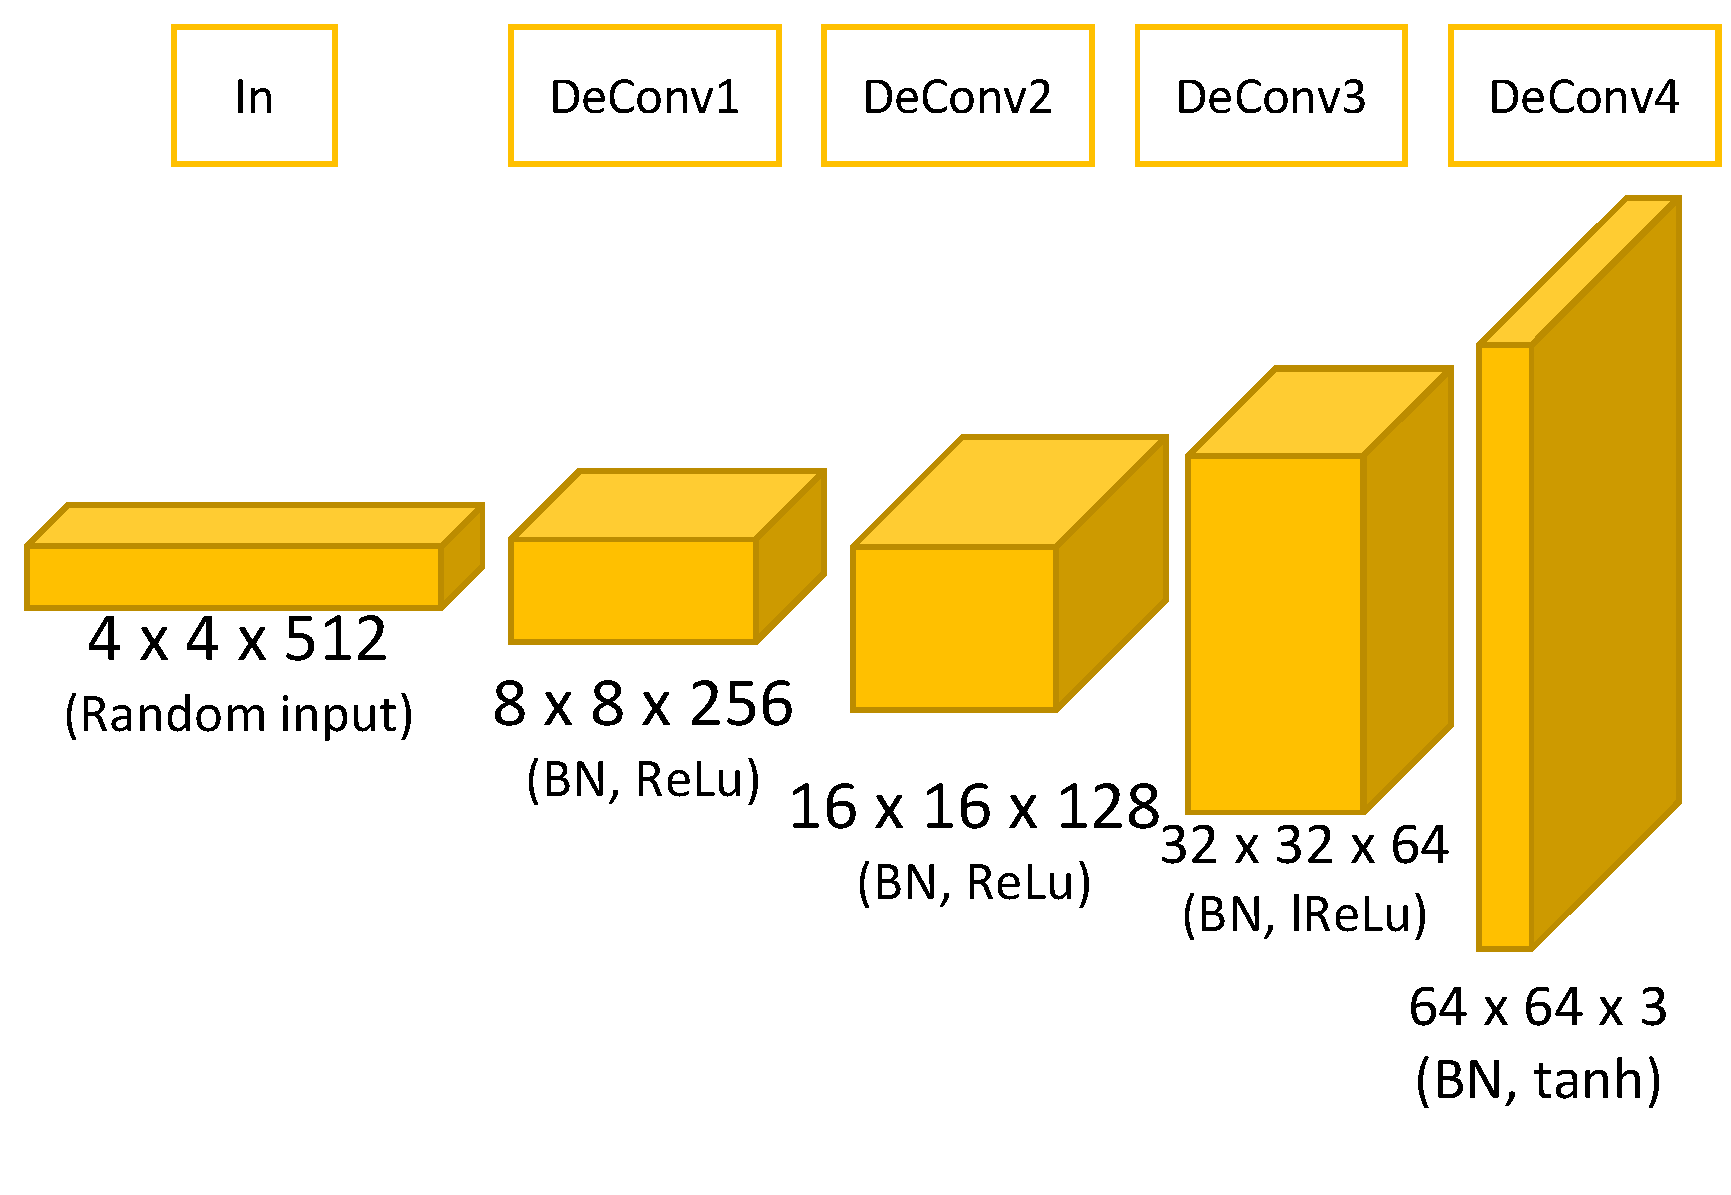

__Discriminator__ 
1. For this, input the real images from actual data tha needs to be generated like CIFAR1
2. Also, you input the output of generator into the discriminator
3. Convolutional layer of discrimnator is the normal convolution we are used to.
4. This are downscaled to the input that is suitable for classification. 

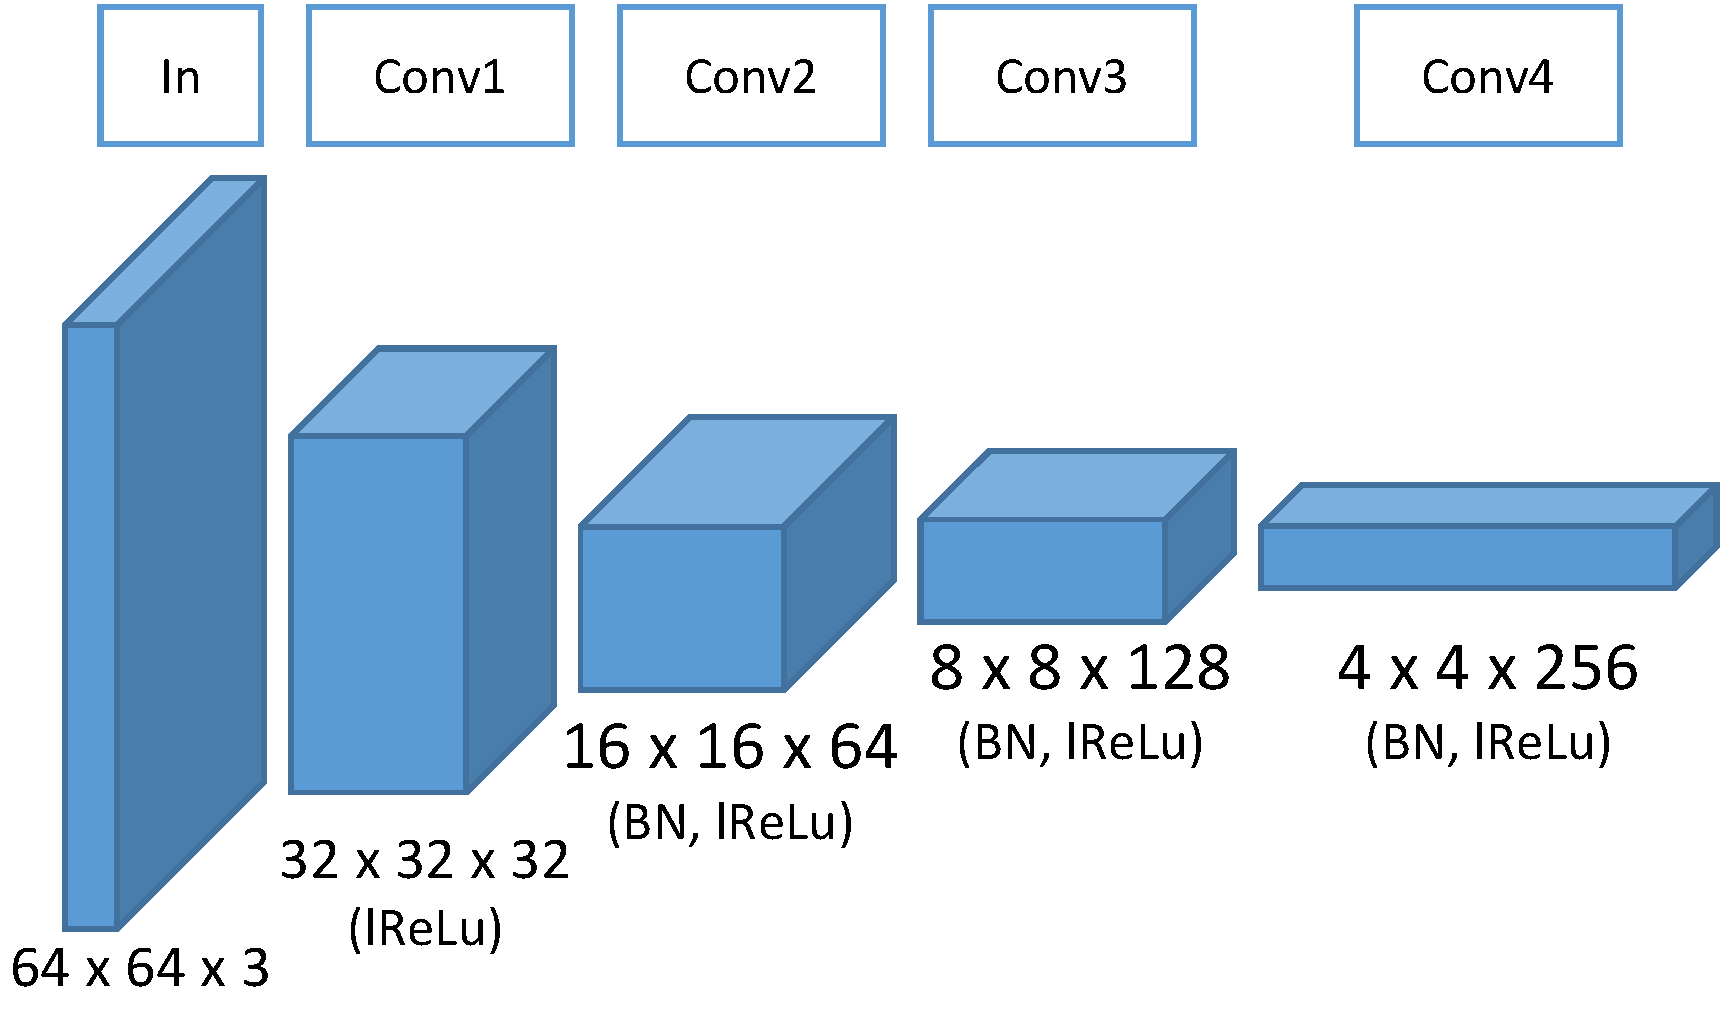


__How can we optimise both as a whole?__
After data is passed through both generator and discriminator, optimisation with backpropagation begins, the goal is to kepp improving at a level pace for both models to be good at its role, equilibrium point is exactly when the discriminator is leaning 50% to both sides, meaning that both images could either be real or fake, where the generator model tries to minimize the probability that the discriminator will predict the generator's output as fake. On the other side, the discriminator tries to maximize the probability that it will correctly classify both real and fake image

<a class="anchor" id="1"></a>
## <font color='#71a1e3'> __Import Libraries__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


In [1]:
!pip install -q keras-tuner pandas matplotlib seaborn scikit-learn tqdm tensorflow_addons scikit-image

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### Other Imports

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report, accuracy_score

import os, time, math, datetime, warnings, pytz, glob
from IPython.display import display
from functools import reduce
import absl.logging
from tqdm import tqdm
import logging
from scipy.linalg import sqrtm
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

absl.logging.set_verbosity(absl.logging.ERROR)
logging.getLogger('tensorflow').disabled = True
warnings.filterwarnings('ignore')

### Tensorflow Import

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow import expand_dims
from tensorflow.keras import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras import backend as K
from tensorflow.image import random_flip_left_right, random_crop, resize_with_crop_or_pad
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (Embedding, Dense, Input, InputLayer, Normalization, Flatten,BatchNormalization,
    Dropout,Conv2D, GlobalAveragePooling2D, MaxPooling2D, ReLU, Layer,Activation, Multiply, AveragePooling2D,
    Add, RandomRotation,Resizing, Rescaling, Reshape, Concatenate, concatenate, Lambda,LeakyReLU)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, TerminateOnNaN, TensorBoard, CSVLogger, Callback
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Adagrad, Adamax
from tensorflow.keras.regularizers import l2, L2
from tensorflow.keras.optimizers.schedules import *
from tensorflow.keras.metrics import FalseNegatives, categorical_crossentropy, sparse_categorical_crossentropy,BinaryCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import *
from tensorflow_addons.optimizers import SWA
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import pairwise_kernels
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import PReLU,Dense, GlobalAveragePooling2D, Input, Conv2DTranspose
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import RandomNormal
from tensorflow_addons.layers import SpectralNormalization
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Conv2D, Dense, Reshape, Flatten, Layer, LayerNormalization

from tensorflow.keras.datasets import cifar10
from kerastuner.tuners import Hyperband
from kerastuner import HyperModel
# Setting a seaborn style
sns.set(style="whitegrid")







### Set the seed of this notebook

In [4]:
seed = 32
tf.random.set_seed(seed)
np.random.seed(seed)

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Check for GPU__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is check the available GPUs and set the memory growth

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPU")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPU


In [6]:
!nvidia-smi

Wed Jan 31 08:36:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:03:00.0 Off |                  Off |
|  0%   52C    P2              69W / 450W |    548MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Import Dataset__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


In [7]:
data = tf.keras.datasets.cifar10.load_data()
(x_train, y_train) , (x_test, y_test) = data

170498071/170498071 [==============================] - 3s 0us/step


In [8]:
y_train = to_categorical(y_train)

In [9]:
x_train.shape

(50000, 32, 32, 3)

### Set the labels for the Classes

This is so that we are able to use it for EDA and model training later on

In [10]:
cifarLab = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
class_labels = {idx: label for idx, label in enumerate(cifarLab)}
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Feature Engineering__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


Below is the idea of feature engineering

1. **Convert Data Type**:
    ```python
    x_train = x_train.astype('float32')
    ```
    This line converts the data type of `x_train` elements to `float32`. It's a standard practice to use floating-point numbers in computations involving neural networks due to their capability to represent decimal values, which are crucial for the granularity of learning.

2. **Scale the Data**:
    ```python
    x_train /= (255/2)
    ```
    Here, the pixel values of the images (assuming `x_train` contains image data) are scaled. Usually, image data comes in the format of integers ranging from 0 to 255 (8-bit representation). This operation scales the data to a new range. Dividing by `(255/2)` scales the data to a range of [0, 2].

3. **Shift the Data**:
    ```python
    x_train -= 1
    ```
    This operation shifts the data range from [0, 2] to [-1, 1]. Shifting data to be centered around zero (mean = 0) can significantly improve the convergence during training, as it ensures that the input features have similar scales.




In [ ]:
x_train = x_train.astype('float32')
x_train /= (255/2)
x_train -= 1


In [11]:

x_train = x_train.astype('float32')
x_train /= (255/2)
x_train -= 1
latent_dim = 128

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Evaluation Metrics__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


### KID (Kernel Inception Distance)
1. Metrics used for evaluting the quality of images generated by GAN. This measures the similarity between two sets of images by comparing the statistics of deep features. These uses the pre trained Inception model

   $$
   MMD^2 = \frac{1}{m^2} \sum_{i=1}^{m} \sum_{j=1}^{m} K(x_i, x_j) + \frac{1}{n^2} \sum_{i=1}^{n} \sum_{j=1}^{n} K(y_i, y_j) - \frac{2}{mn} \sum_{i=1}^{m} \sum_{j=1}^{n} K(x_i, y_j)
   $$

- Compute the kernel metrics using kernel function
- Calculate the mean Maximum Mean Discrepancy
- Final average KID values computed over entire dataset
### FID
- Metrics that compares the statistics of generated images to real images in the feature space of a deep learning model (Inception model) and calculate the distance betwen the feature vectors of the real and generated images, lower FID implies that better quality of generated images

$$
FID = ||\mu_x - \mu_y||^2 + Tr(\Sigma_x + \Sigma_y - 2(\Sigma_x \Sigma_y)^{1/2})
$$
- Includes the Euclidean distance between mean vectors of real and generated images
- Tr denotes the trace of matrix
$$
(\Sigma_x \Sigma_y)^{1/2}
$$
 Denotes the sqaure root of the product of the covariance matrices which is computed using methods eigen decomposition




In [12]:

class Evaluation:
    def __init__(self, generator, latent_dim, sizeOfBatch, sample_size, sizeOfBuffer):
        self.generator = generator
        self.latent_dim = latent_dim
        self.sizeOfBatch = sizeOfBatch
        self.sample_size = sample_size
        self.sizeOfBuffer = sizeOfBuffer

        self.inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
        self.AUTO = tf.data.experimental.AUTOTUNE

    def generate_images(self, num_images,labels=None):
        print(labels)
        if labels is not None:
            random_latent_vectors = tf.random.normal(shape=(num_images, self.latent_dim))
            labels = tf.one_hot(labels, depth=10)  
            generated_images = self.generator.predict([random_latent_vectors, labels])
        else:
            random_latent_vectors = tf.random.normal(shape=(num_images, self.latent_dim))
            generated_images = self.generator.predict(random_latent_vectors)
        return generated_images

    def plot_loss_curve(self, history, title='Loss Curve'):
        plt.figure(figsize=(10, 5))
        plt.plot(history['g_loss'], label='Generator Loss')
        plt.plot(history['d_loss'], label='Discriminator Loss')
        plt.title(title)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

    def compute_metrics(self, train_data,cgan=False):
        real_images = tf.data.Dataset.from_tensor_slices(train_data).shuffle(self.sizeOfBuffer).batch(self.sizeOfBatch).map(self.__scale_and_preprocess).prefetch(self.AUTO)
        
        if cgan:
            class_labels = np.arange(10)
            class_labels = np.repeat(class_labels, self.sample_size / 10).flatten()
            generated_images = self.generate_images(self.sample_size, class_labels)
            generated_images = tf.data.Dataset.from_tensor_slices(generated_images).batch(self.sizeOfBatch).map(self.__scale_and_preprocess).prefetch(self.AUTO)
        else:
            generated_images = self.generate_images(self.sample_size)
            generated_images = tf.data.Dataset.from_tensor_slices(generated_images).batch(self.sizeOfBatch).map(self.__scale_and_preprocess).prefetch(self.AUTO)
        real_embeddings = self.__compute_embeddings(real_images, math.ceil(len(train_data) / self.sizeOfBatch))
        generated_embeddings = self.__compute_embeddings(generated_images, math.ceil(self.sample_size / self.sizeOfBatch))

        fid = self.__calculate_fid(real_embeddings, generated_embeddings)
        kid = self.__calculate_kid(real_embeddings, generated_embeddings)
        return fid, kid

        
    def __calculate_kid(self,real_embeddings, generated_embeddings):
        kernel_real = pairwise_kernels(real_embeddings, metric='polynomial', degree=3)
        kernel_gen = pairwise_kernels(generated_embeddings, metric='polynomial', degree=3)
        kernel_real_gen = pairwise_kernels(real_embeddings, generated_embeddings, metric='polynomial', degree=3)

        m = real_embeddings.shape[0]
        n = generated_embeddings.shape[0]

        kid = (np.sum(kernel_real) / (m * (m - 1)) +
               np.sum(kernel_gen) / (n * (n - 1)) -
               2 * np.sum(kernel_real_gen) / (m * n))
        return kid
    def __scale_and_preprocess(self, image):
        image = (image + 1) / 2 * 255.0
        image = preprocess_input(image)
        return tf.image.resize(image, (299, 299))

    def __compute_embeddings(self, dataloader, count):
        embeddings = []
        for batch in (dataloader.take(count)):
            batch_embeddings = self.inception_model.predict(batch, verbose=0)
            embeddings.extend(batch_embeddings)
        return np.array(embeddings)

    def __calculate_fid(self, real_embeddings, generated_embeddings):
        mu1, sigma1 = real_embeddings.mean(axis=0), np.cov(real_embeddings, rowvar=False)
        mu2, sigma2 = generated_embeddings.mean(axis=0), np.cov(generated_embeddings, rowvar=False)
        ssdiff = np.sum((mu1 - mu2)**2.0)
        covmean = sqrtm(sigma1.dot(sigma2))
        if np.iscomplexobj(covmean):
            covmean = covmean.real
        return ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)


In [13]:
def generate_1000(generator, num_iterations=10, saveDisk=False):
    for iteration in range(num_iterations):
        latent_z = np.random.normal(size=(100, 128))
        imgs = generator.predict(latent_z)
        fig, axes = plt.subplots(10, 10, figsize=(30, 30))  
        fig.patch.set_facecolor('#abdbe3')
        fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.1, wspace=0.1)
        
        for idx, ax in enumerate(axes.flatten()):
            ax.imshow((imgs[idx] + 1) / 2, interpolation='nearest')
            ax.axis('off')
    
        if saveDisk:
            plt.savefig(f'generated_images_set_{iteration + 1}.png', bbox_inches='tight', pad_inches=0.5)  # Adjust padding
        else:
            plt.show()

        plt.close(fig) 

In [14]:
def train_gan(d, g, latent_dim, model_name, data, e, learning_rate=2e-4, beta_1=0.5, use_multiprocessing=True, workers=16, callbacks=None):
    gan = DCGAN(discriminator=d,generator=g,latent_dim=128,model_name=model_name)
    gan.compile(
        d_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
        g_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
        loss_fn=tf.keras.losses.BinaryCrossentropy(),
    )
    gan_hist = gan.fit(
        dataset,
        epochs=e,
        use_multiprocessing=True,
        workers=16,
        callbacks=callbacks
    )
    return gan_hist, gan


In [15]:
import tensorflow as tf
model_c = tf.keras.models.load_model('efficientNetClassifier.h5')


<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Baseline Model (Self Attention)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">



## __Key Ideas__
- Self attention, allows model to weigh the significance of different parts of input data differently. It enables the model to focus on relavant parts of the image when generating new images
Below shows how it generally looks like 
- Allows model to consider entire spatial extent of image, therefore helping it to udnerstand and generate images with complex compositions
- Able to incooperate to both the gnerator and discriminator






### Creating the dataset

In [16]:
full_scores = pd.DataFrame()

In [17]:
sizeOfBatch = 64
AUTO = tf.data.AUTOTUNE
sizeOfBuffer = 1024
noise = 128
numberClass = 10

In [18]:
dataset = tf.data.Dataset.from_tensor_slices(x_train)
dataset = dataset.shuffle(buffer_size=sizeOfBuffer).batch(
    batch_size=sizeOfBatch, num_parallel_calls=AUTO).prefetch(AUTO)

### Training Loop and Callbacks

#### Model Training

In [19]:
class DCGAN(tf.keras.Model):
    def __init__(self, model_name, discriminator, generator, latent_dim):
        super(DCGAN, self).__init__()
        self.model_name = model_name
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_fake_loss_metric = tf.keras.metrics.Mean(name="disc_fake_loss")
        self.d_real_loss_metric = tf.keras.metrics.Mean(name="disc_real_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="gen_loss")
        self.d_acc_metric = tf.keras.metrics.BinaryAccuracy(name="disc_acc")

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(DCGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
    
    def train_step(self, real_images):
        batch_s = tf.shape(real_images)[0]
        real_labels = tf.zeros((batch_s, 1))  

        # Training the discriminator
        with tf.GradientTape() as tape:
            real_predictions = self.discriminator(real_images)
            d_real_loss = self.loss_fn(real_labels, real_predictions)
            real_output = tf.reduce_mean(real_predictions)

        grads = tape.gradient(d_real_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Training the generator
        random_latent_vectors = tf.random.normal(shape=(batch_s, self.latent_dim))
        generated_images = self.generator(random_latent_vectors)
        fake_labels = tf.ones((batch_s, 1)) 
        with tf.GradientTape() as tape:
            fake_predictions = self.discriminator(generated_images)
            d_fake_loss = self.loss_fn(fake_labels, fake_predictions)
            fake_output = tf.reduce_mean(fake_predictions)

        grads = tape.gradient(d_fake_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Getting the prediction
        misleading_labels = tf.zeros((batch_s, 1))
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)

        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Updating the metrics
        self.d_real_loss_metric.update_state(d_real_loss)
        self.d_fake_loss_metric.update_state(d_fake_loss)
        self.g_loss_metric.update_state(g_loss)
        self.d_acc_metric.update_state(tf.concat([real_labels, fake_labels], axis=0), tf.concat([real_predictions, fake_predictions], axis=0))

        return {
            "d_real_loss": self.d_real_loss_metric.result(),
            "d_fake_loss": self.d_fake_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
            "d_acc": self.d_acc_metric.result(),
            "d_realO": real_output,
            "d_fakeO": fake_output
        }

#### Callback

In [20]:
class ImageGenerationCallback(tf.keras.callbacks.Callback):
    def __init__(self, num_img=10, noise=128,  vmin=-1, vmax=1):
        self.num_img = num_img
        self.noise = noise
        self.vmin = vmin
        self.vmax = vmax
        self.constant_noise = tf.random.normal(shape=(self.num_img, self.noise))
    
    # Generating the plot
    def generate_plot(self):
        generated_images = self.model.generator(self.constant_noise)
        generated_images = (generated_images - self.vmin) / (self.vmax - self.vmin)

        fig = plt.figure(figsize=(12, 6))
        gs = gridspec.GridSpec(2, 5)
        for i in range(self.num_img):
            ax = plt.subplot(gs[i])
            ax.imshow(generated_images[i, :, :, :])
            ax.axis('off')
        fig.patch.set_facecolor('#f0f0f0')  
        plt.suptitle("Generated Images", fontsize=16)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.show()

    # Generate plots every 10 epoch
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            self.generate_plot()

In [21]:
class ModelCheckpointCallback(tf.keras.callbacks.Callback):
    def __init__(self, save_freq=10, model_dir='GAN'):
        self.save_freq = save_freq
        self.model_dir = model_dir

    # Saving the weights
    def save_weights(self, epoch=None):
        if epoch is not None:
            name = f'generator-{epoch}.h5'
            full_path = os.path.join(self.model_dir, name)
            os.makedirs(self.model_dir, exist_ok=True)
            self.model.generator.save_weights(filepath=full_path, save_format='h5')
    
    # Saving after end 
    def on_train_end(self, logs=None):
        if not os.path.exists(self.model_dir):
            os.makedirs(self.model_dir)
        self.save_weights('final')

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.save_freq == 0:
            self.save_weights(epoch)



In [22]:
class SelfAttention(Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(SelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[-1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(SelfAttention, self).build(input_shape)

    def call(self, x):
        batch_size, height, width, channels = x.shape
        # Handle None in batch_size by using '-1' which works as a placeholder for "whatever fits".
        x_flat = tf.reshape(x, [-1, height * width, channels])
        # Implement your attention mechanism and reshape output here...
        # As a placeholder, I'm just applying a simple kernel here:
        x_flat = tf.matmul(x_flat, self.kernel)
        # Reshape back to the original dimensions (except for channels)
        x_reshaped = tf.reshape(x_flat, [-1, height, width, self.output_dim])
        return x_reshaped

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], input_shape[2], self.output_dim)

### First Model

##### Generator

__Key Difference__
1. Change upsamling to conv transpose here

__Key Ideas__

1. **Input and Dense Layer**:
    - **Dense Layer**: 
        - **Units**: The layer has 128 * 8 * 8 units.
        - **Input**: Takes an input of dimension `latent_dim` representing the latent space.
        - **Kernel Initializer**: Utilizes `RandomNormal` with a standard deviation of `GAUSS_SD` for weight initialization.
2. **Reshape Layer**:
    - **New Shape**: Reshapes the output of the Dense layer into an 8x8x128 tensor

3. **Normalization and Activation**:
    - **BatchNormalization**: 
        - **Momentum**: Utilizes a momentum factor of `MOMENTUM`.
    - **LeakyReLU**:
        - **Alpha**: Set to `ALPHA`.

4. **Transposed Convolution Layers**:
    - **Conv2DTranspose (First Layer)**:
        - **Filters**: 128
        - **Kernel Size**: 5x5
        - **Strides**: 2
        - **Padding**: 'same'

    - **Conv2DTranspose (Second Layer)**:
        - **Filters**: 3 (corresponding to RGB channels)
        - **Kernel Size**: 5x5
        - **Strides**: 2
        - **Padding**: 'same'
        - **Activation**: 'tanh'


In [23]:
ALPHA = 0.2
MOMENTUM = 0.8
GAUSS_SD = 0.02
def build_generator(latent_dim):
    model = Sequential(name='Generator')
    model.add(Dense(units=128 * 8 * 8, input_shape=(latent_dim,), kernel_initializer=RandomNormal(stddev=GAUSS_SD)))
    model.add(Reshape((8, 8, 128)))
    model.add(BatchNormalization(momentum=MOMENTUM))
    model.add(LeakyReLU(ALPHA))
    model.add(Conv2DTranspose(filters=128, kernel_size=(5, 5), strides=2, padding='same'))
    model.add(BatchNormalization(momentum=MOMENTUM))
    model.add(SelfAttention(128))
    model.add(LeakyReLU(ALPHA))
    model.add(Conv2DTranspose(filters=3, kernel_size=(5, 5), strides=2, padding='same', activation='tanh'))
    return model

##### Discriminator

__Key Ideas__
1. Addition of self attention layer

__Model Ideas__

1 **Input and Convolutional Layers**:
   - **Conv2D** (First Layer):
     - **Filters**: 64
     - **Kernel Size**: (5, 5), captures the spatial features.
     - **Strides**: 2
     - **Padding**: 'same'
     - **Kernel Initializer**: `RandomNormal(stddev=GAUSS_SD)`
     - **Input Shape**: `in_shape` (the shape of the input images).
   - **LeakyReLU**:
     - **Alpha**: `ALPHA`

   - **Conv2D** (Second Layer):
     - **Filters**: 128
     - **Kernel Size**: (5, 5)
     - **Strides**: 2
     - **Padding**: 'same'

   - **BatchNormalization**:
     - **Momentum**: `MOMENTUM`

   - **LeakyReLU**:
     - **Alpha**: `ALPHA`

3. **Flattening and Output Layer**:
   - **Flatten**:
   - **Dropout**:
     - **Rate**: 0.4,
   - **Dense**:
     - **Units**: 1, the output layer for binary classification.
     - **Activation**: 'sigmoid'


In [24]:
def build_discriminator(in_shape=(32, 32, 3)):
    model = Sequential(name='Discriminator')
    model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=2, padding='same', 
                     kernel_initializer=RandomNormal(stddev=GAUSS_SD), 
                     input_shape=in_shape))
    model.add(LeakyReLU(ALPHA))
    model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=2, padding='same')) 
    model.add(BatchNormalization(momentum=MOMENTUM))
    model.add(SelfAttention(64))  
    model.add(LeakyReLU(ALPHA))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model

#### Creating Checkpoint

In [25]:
callbacks = [ImageGenerationCallback(num_img=10, noise=128, vmin=-1, vmax=1), ModelCheckpointCallback(model_dir='baselineSADCGAN-1')]

#### Training

In [26]:
discriminator_dcgan2 = build_discriminator()
generator_dcgan2 = build_generator(128)

In [27]:
tf.keras.backend.clear_session()
K.clear_session()

In [28]:
dataset = tf.data.Dataset.from_tensor_slices(x_train)
dataset = dataset.shuffle(buffer_size=sizeOfBuffer).batch(
    batch_size=sizeOfBatch, num_parallel_calls=AUTO).prefetch(AUTO)

Epoch 1/100
782/782 [==============================] - ETA: 0s - d_real_loss: 0.4038 - d_fake_loss: 0.5570 - g_loss: 1.3457 - d_acc: 0.7455 - d_realO: 0.3610 - d_fakeO: 0.6019

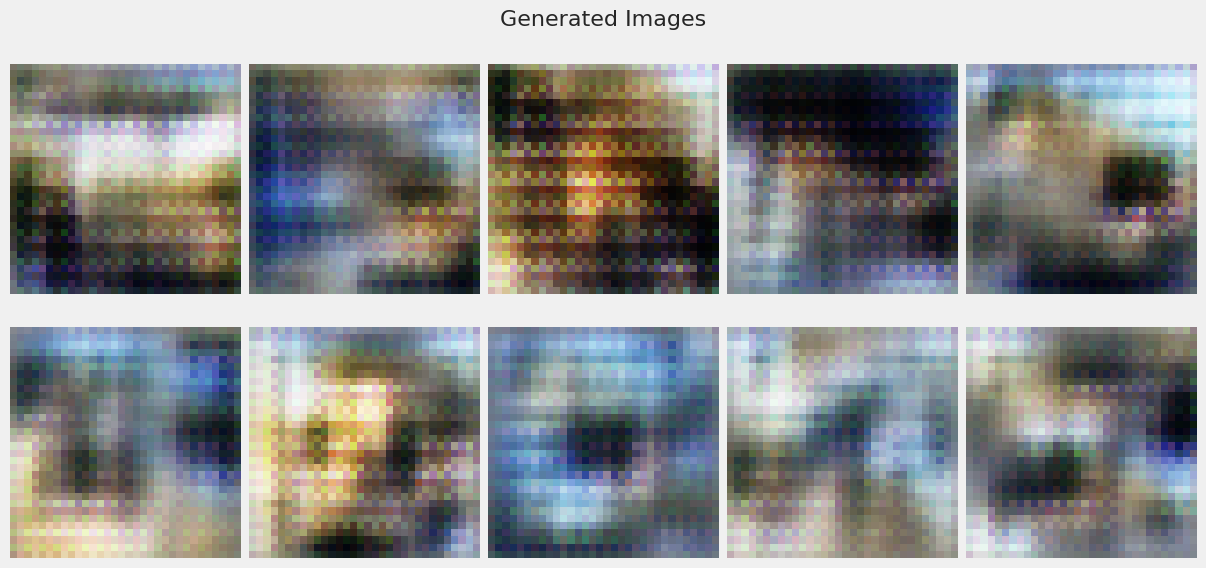

782/782 [==============================] - 18s 16ms/step - d_real_loss: 0.4039 - d_fake_loss: 0.5570 - g_loss: 1.3456 - d_acc: 0.7454 - d_realO: 0.3611 - d_fakeO: 0.6018
Epoch 2/100
782/782 [==============================] - 11s 14ms/step - d_real_loss: 0.6358 - d_fake_loss: 0.6149 - g_loss: 0.9782 - d_acc: 0.6644 - d_realO: 0.4513 - d_fakeO: 0.5431
Epoch 3/100
782/782 [==============================] - 11s 14ms/step - d_real_loss: 0.6337 - d_fake_loss: 0.6375 - g_loss: 0.8933 - d_acc: 0.6391 - d_realO: 0.4594 - d_fakeO: 0.5354
Epoch 4/100
782/782 [==============================] - 11s 14ms/step - d_real_loss: 0.6884 - d_fake_loss: 0.6631 - g_loss: 0.8372 - d_acc: 0.5762 - d_realO: 0.4849 - d_fakeO: 0.5216
Epoch 5/100
782/782 [==============================] - 10s 13ms/step - d_real_loss: 0.6755 - d_fake_loss: 0.6625 - g_loss: 0.8461 - d_acc: 0.5823 - d_realO: 0.4745 - d_fakeO: 0.5264
Epoch 6/100
782/782 [==============================] - 10s 13ms/step - d_real_loss: 0.6303 - d_fake_lo

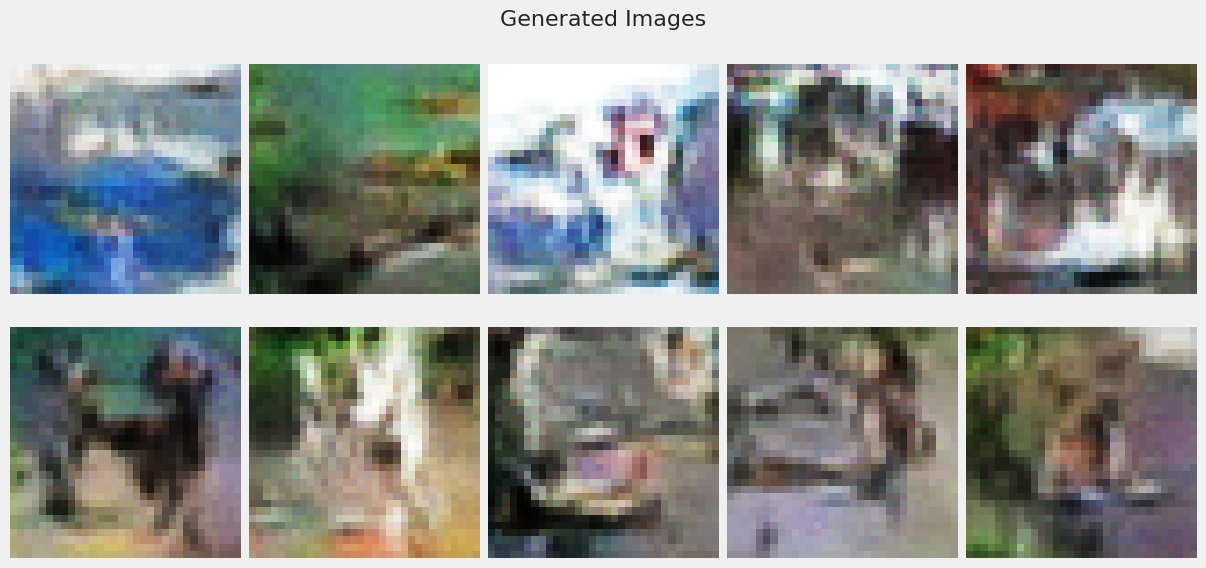

782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.6548 - d_fake_loss: 0.6350 - g_loss: 0.9258 - d_acc: 0.6250 - d_realO: 0.4616 - d_fakeO: 0.5396
Epoch 12/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6624 - d_fake_loss: 0.6396 - g_loss: 0.9226 - d_acc: 0.6095 - d_realO: 0.4645 - d_fakeO: 0.5384
Epoch 13/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6575 - d_fake_loss: 0.6385 - g_loss: 0.9246 - d_acc: 0.6213 - d_realO: 0.4610 - d_fakeO: 0.5405
Epoch 14/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6567 - d_fake_loss: 0.6399 - g_loss: 0.9312 - d_acc: 0.6212 - d_realO: 0.4594 - d_fakeO: 0.5416
Epoch 15/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6476 - d_fake_loss: 0.6272 - g_loss: 0.9455 - d_acc: 0.6343 - d_realO: 0.4548 - d_fakeO: 0.5453
Epoch 16/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6406 - d_fa

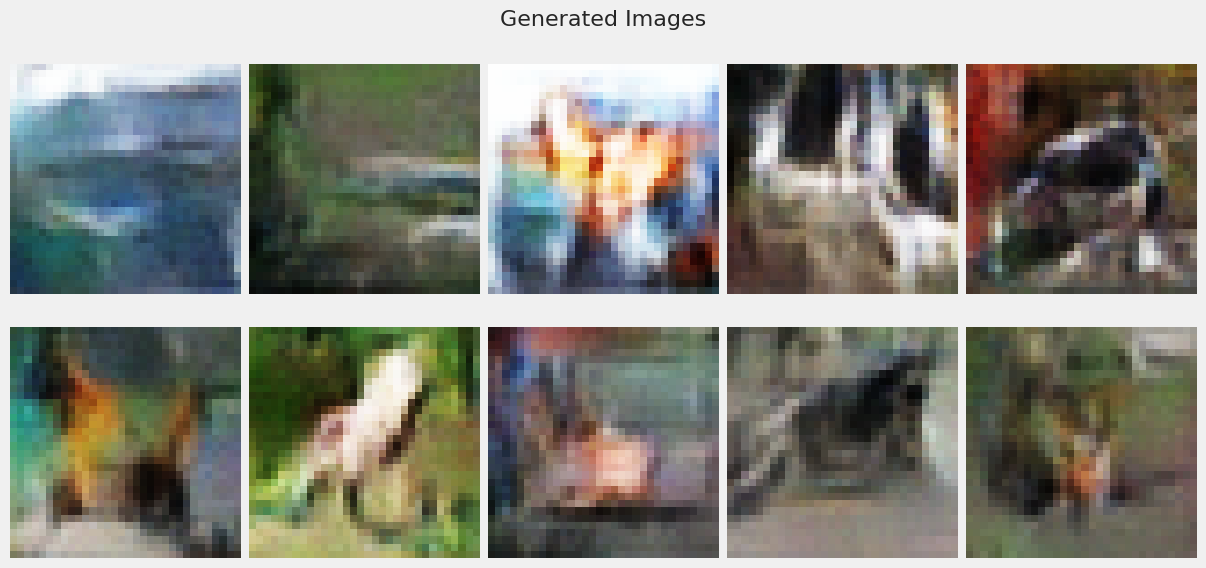

782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.6463 - d_fake_loss: 0.6197 - g_loss: 0.9778 - d_acc: 0.6380 - d_realO: 0.4480 - d_fakeO: 0.5519
Epoch 22/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6521 - d_fake_loss: 0.6261 - g_loss: 0.9794 - d_acc: 0.6324 - d_realO: 0.4503 - d_fakeO: 0.5493
Epoch 23/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6452 - d_fake_loss: 0.6179 - g_loss: 0.9726 - d_acc: 0.6384 - d_realO: 0.4489 - d_fakeO: 0.5507
Epoch 24/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6473 - d_fake_loss: 0.6184 - g_loss: 0.9740 - d_acc: 0.6358 - d_realO: 0.4494 - d_fakeO: 0.5506
Epoch 25/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6469 - d_fake_loss: 0.6170 - g_loss: 0.9650 - d_acc: 0.6347 - d_realO: 0.4501 - d_fakeO: 0.5499
Epoch 26/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6502 - d_fa

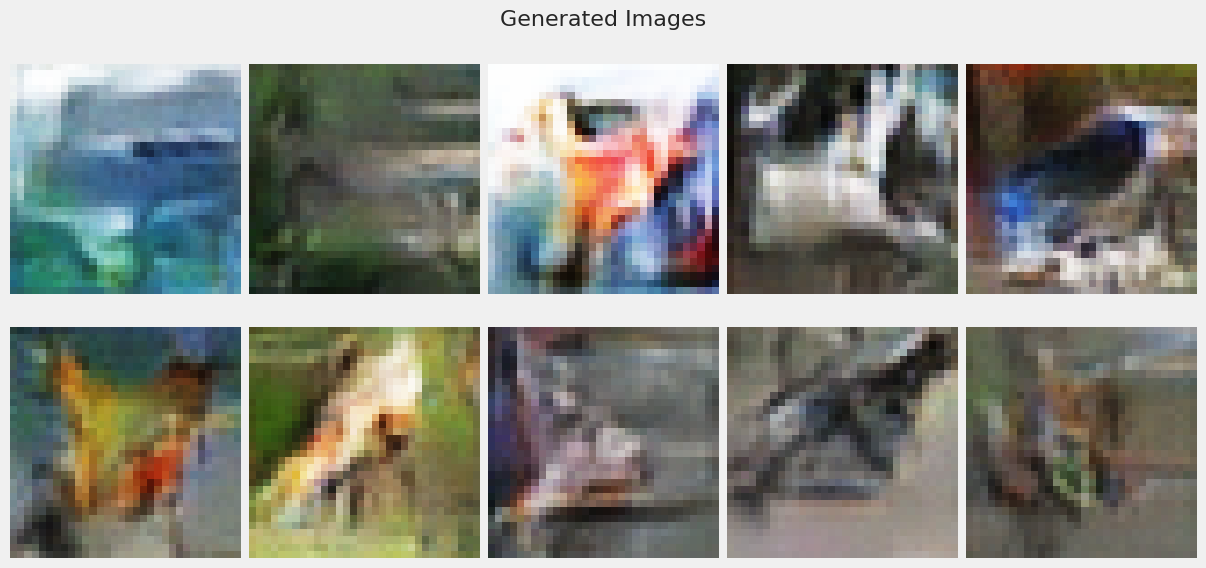

782/782 [==============================] - 14s 17ms/step - d_real_loss: 0.6536 - d_fake_loss: 0.6238 - g_loss: 0.9677 - d_acc: 0.6280 - d_realO: 0.4520 - d_fakeO: 0.5484
Epoch 32/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6506 - d_fake_loss: 0.6222 - g_loss: 0.9556 - d_acc: 0.6288 - d_realO: 0.4509 - d_fakeO: 0.5490
Epoch 33/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6514 - d_fake_loss: 0.6226 - g_loss: 0.9654 - d_acc: 0.6292 - d_realO: 0.4510 - d_fakeO: 0.5490
Epoch 34/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6552 - d_fake_loss: 0.6262 - g_loss: 0.9642 - d_acc: 0.6241 - d_realO: 0.4521 - d_fakeO: 0.5480
Epoch 35/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6490 - d_fake_loss: 0.6189 - g_loss: 0.9639 - d_acc: 0.6336 - d_realO: 0.4501 - d_fakeO: 0.5500
Epoch 36/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6508 - d_fa

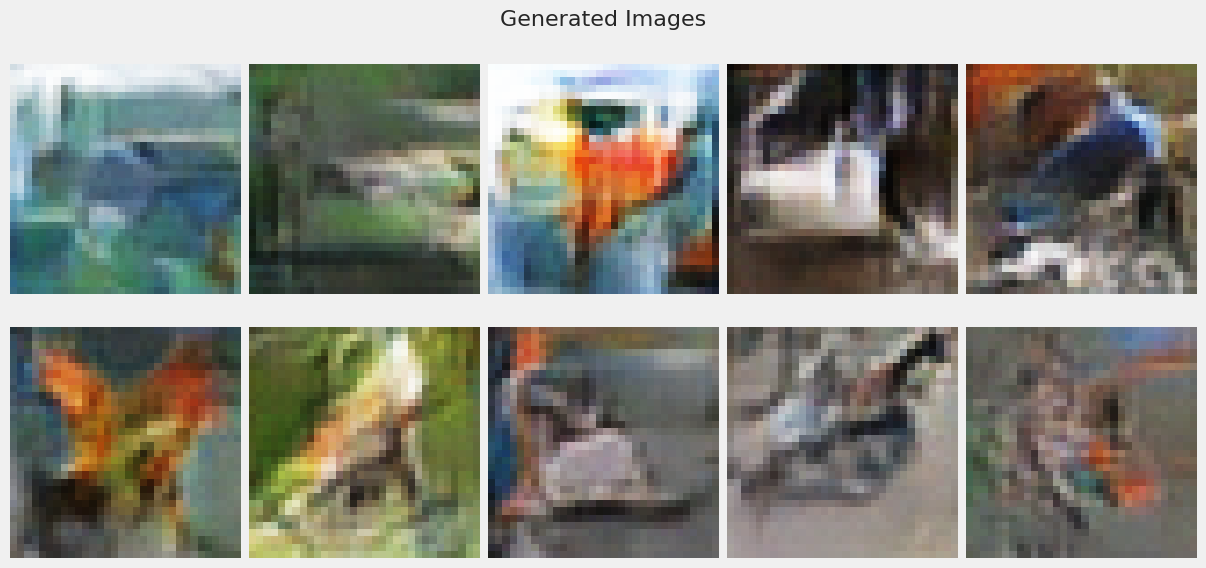

782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.6518 - d_fake_loss: 0.6295 - g_loss: 0.9783 - d_acc: 0.6298 - d_realO: 0.4483 - d_fakeO: 0.5517
Epoch 42/100
782/782 [==============================] - 12s 16ms/step - d_real_loss: 0.6409 - d_fake_loss: 0.6103 - g_loss: 0.9914 - d_acc: 0.6464 - d_realO: 0.4448 - d_fakeO: 0.5549
Epoch 43/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6451 - d_fake_loss: 0.6126 - g_loss: 0.9918 - d_acc: 0.6393 - d_realO: 0.4458 - d_fakeO: 0.5539
Epoch 44/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6468 - d_fake_loss: 0.6153 - g_loss: 0.9906 - d_acc: 0.6373 - d_realO: 0.4455 - d_fakeO: 0.5542
Epoch 45/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6456 - d_fake_loss: 0.6140 - g_loss: 0.9957 - d_acc: 0.6422 - d_realO: 0.4444 - d_fakeO: 0.5556
Epoch 46/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6409 - d_fa

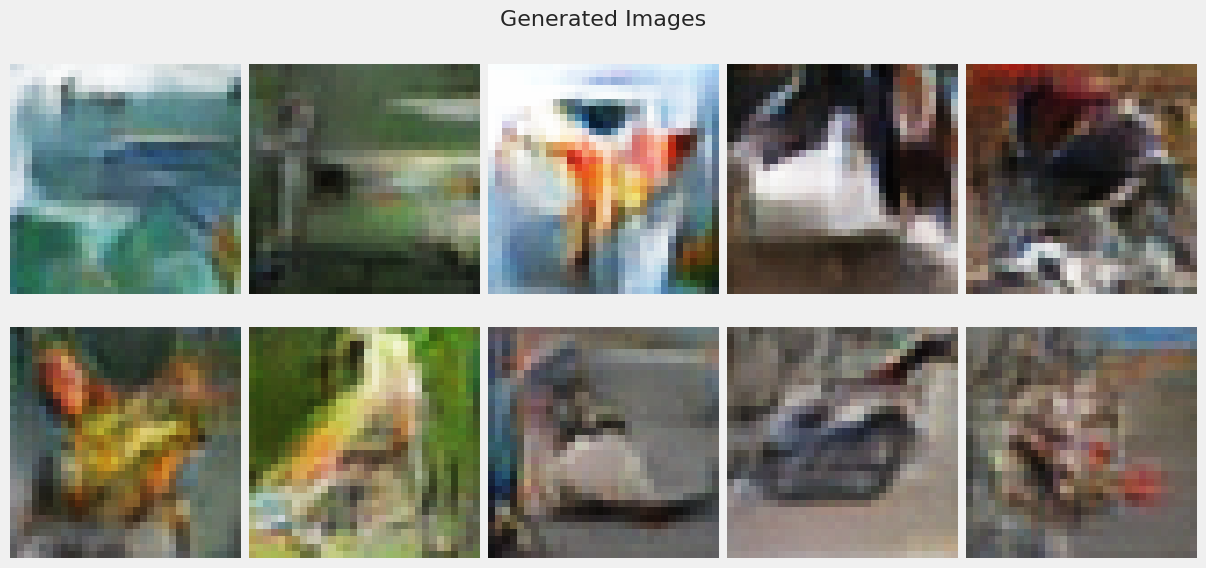

782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.6385 - d_fake_loss: 0.6043 - g_loss: 1.0216 - d_acc: 0.6513 - d_realO: 0.4389 - d_fakeO: 0.5609
Epoch 52/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6378 - d_fake_loss: 0.6012 - g_loss: 1.0254 - d_acc: 0.6528 - d_realO: 0.4362 - d_fakeO: 0.5637
Epoch 53/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6378 - d_fake_loss: 0.6080 - g_loss: 1.0296 - d_acc: 0.6524 - d_realO: 0.4363 - d_fakeO: 0.5637
Epoch 54/100
782/782 [==============================] - 12s 16ms/step - d_real_loss: 0.6304 - d_fake_loss: 0.5953 - g_loss: 1.0498 - d_acc: 0.6607 - d_realO: 0.4347 - d_fakeO: 0.5649
Epoch 55/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6296 - d_fake_loss: 0.5907 - g_loss: 1.0387 - d_acc: 0.6655 - d_realO: 0.4319 - d_fakeO: 0.5682
Epoch 56/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6348 - d_fa

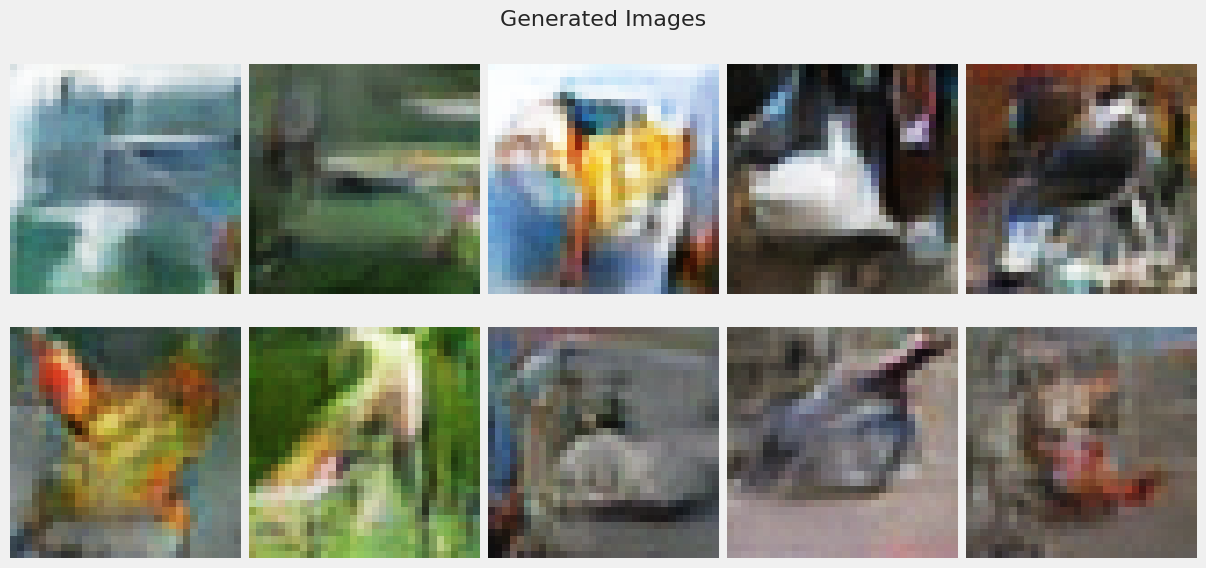

782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.6398 - d_fake_loss: 0.6211 - g_loss: 1.0699 - d_acc: 0.6596 - d_realO: 0.4277 - d_fakeO: 0.5716
Epoch 62/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6223 - d_fake_loss: 0.5803 - g_loss: 1.0874 - d_acc: 0.6735 - d_realO: 0.4241 - d_fakeO: 0.5755
Epoch 63/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6220 - d_fake_loss: 0.5782 - g_loss: 1.1009 - d_acc: 0.6735 - d_realO: 0.4220 - d_fakeO: 0.5782
Epoch 64/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6218 - d_fake_loss: 0.5818 - g_loss: 1.1125 - d_acc: 0.6732 - d_realO: 0.4221 - d_fakeO: 0.5776
Epoch 65/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6206 - d_fake_loss: 0.5794 - g_loss: 1.1097 - d_acc: 0.6764 - d_realO: 0.4196 - d_fakeO: 0.5807
Epoch 66/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6154 - d_fa

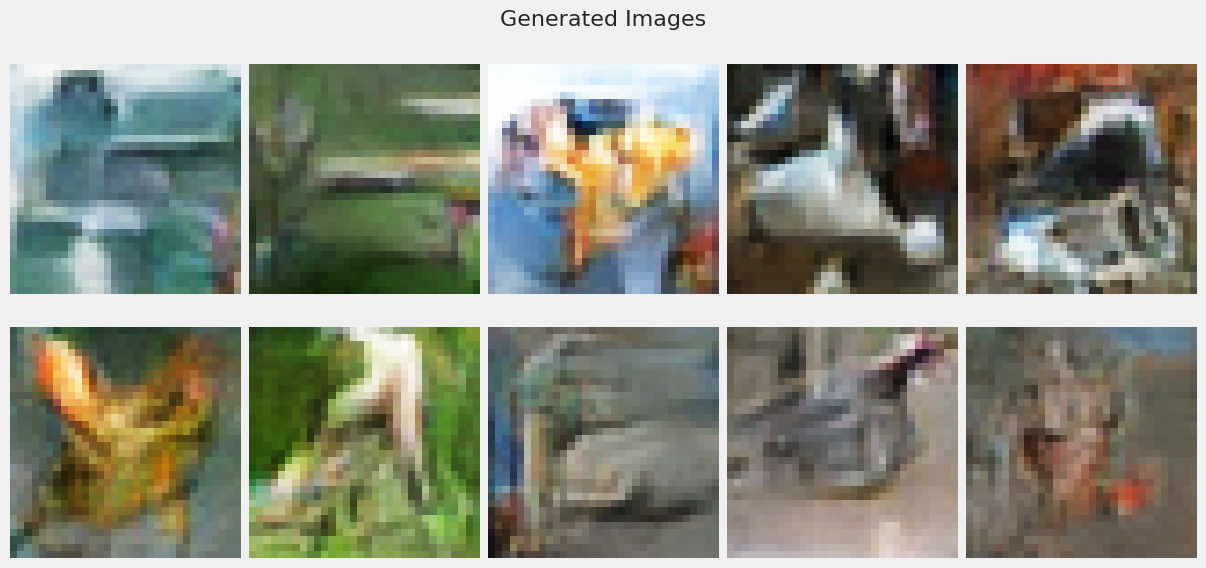

782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.6097 - d_fake_loss: 0.5644 - g_loss: 1.1813 - d_acc: 0.6865 - d_realO: 0.4086 - d_fakeO: 0.5911
Epoch 72/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6155 - d_fake_loss: 0.5661 - g_loss: 1.1958 - d_acc: 0.6851 - d_realO: 0.4072 - d_fakeO: 0.5927
Epoch 73/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6095 - d_fake_loss: 0.5683 - g_loss: 1.1942 - d_acc: 0.6917 - d_realO: 0.4055 - d_fakeO: 0.5941
Epoch 74/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6025 - d_fake_loss: 0.5489 - g_loss: 1.2232 - d_acc: 0.7005 - d_realO: 0.4005 - d_fakeO: 0.5997
Epoch 75/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6026 - d_fake_loss: 0.5533 - g_loss: 1.2251 - d_acc: 0.6979 - d_realO: 0.4018 - d_fakeO: 0.5980
Epoch 76/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6008 - d_fa

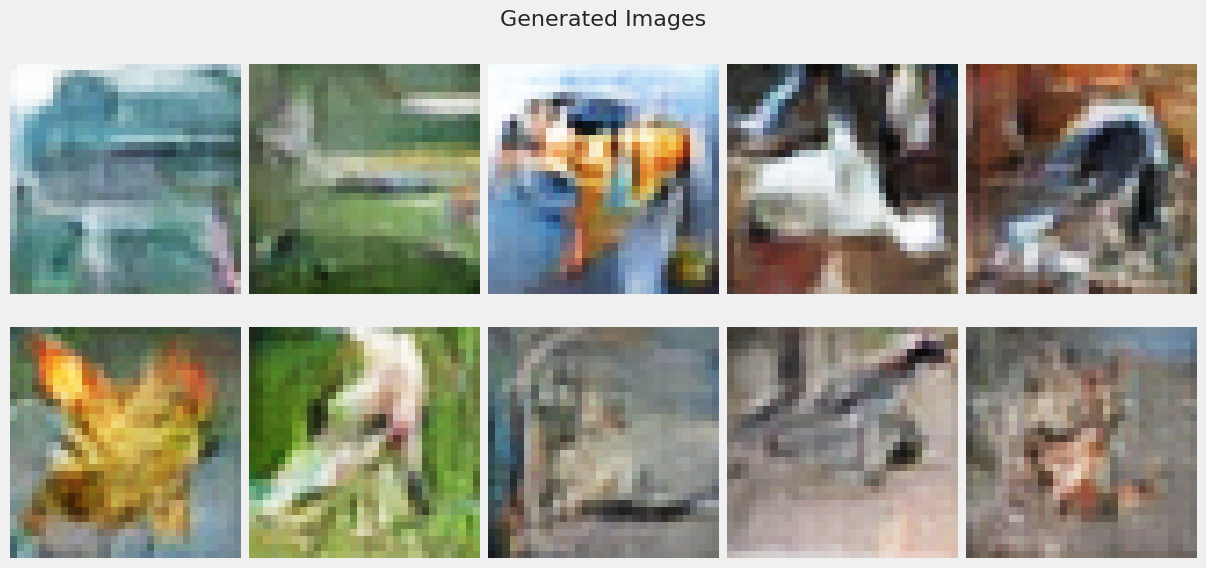

782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.5895 - d_fake_loss: 0.5316 - g_loss: 1.3095 - d_acc: 0.7106 - d_realO: 0.3893 - d_fakeO: 0.6110
Epoch 82/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.5919 - d_fake_loss: 0.5392 - g_loss: 1.2729 - d_acc: 0.7089 - d_realO: 0.3894 - d_fakeO: 0.6102
Epoch 83/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.5931 - d_fake_loss: 0.5372 - g_loss: 1.3019 - d_acc: 0.7126 - d_realO: 0.3889 - d_fakeO: 0.6109
Epoch 84/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.5817 - d_fake_loss: 0.5228 - g_loss: 1.3042 - d_acc: 0.7180 - d_realO: 0.3843 - d_fakeO: 0.6157
Epoch 85/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.5851 - d_fake_loss: 0.5243 - g_loss: 1.3054 - d_acc: 0.7161 - d_realO: 0.3854 - d_fakeO: 0.6142
Epoch 86/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.5851 - d_fa

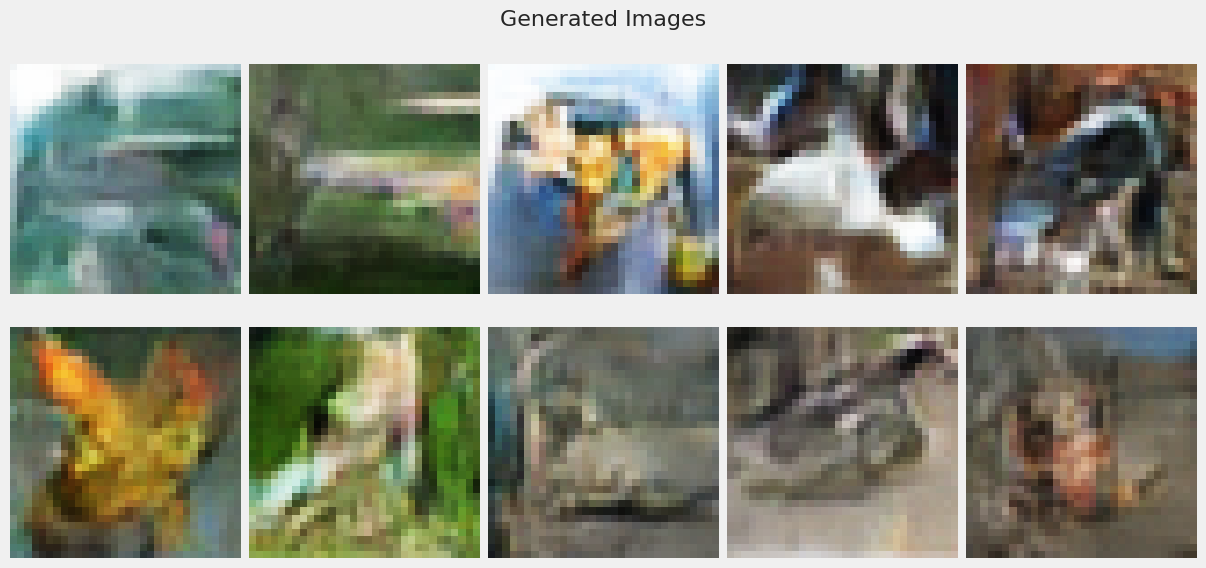

782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.5667 - d_fake_loss: 0.5072 - g_loss: 1.3902 - d_acc: 0.7331 - d_realO: 0.3741 - d_fakeO: 0.6255
Epoch 92/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.5668 - d_fake_loss: 0.4993 - g_loss: 1.3516 - d_acc: 0.7349 - d_realO: 0.3740 - d_fakeO: 0.6256
Epoch 93/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.5660 - d_fake_loss: 0.4984 - g_loss: 1.3738 - d_acc: 0.7344 - d_realO: 0.3717 - d_fakeO: 0.6285
Epoch 94/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.5734 - d_fake_loss: 0.5077 - g_loss: 1.4058 - d_acc: 0.7299 - d_realO: 0.3689 - d_fakeO: 0.6308
Epoch 95/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.5777 - d_fake_loss: 0.5214 - g_loss: 1.4119 - d_acc: 0.7270 - d_realO: 0.3678 - d_fakeO: 0.6321
Epoch 96/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.5654 - d_fa

In [29]:
gan_2= train_gan(discriminator_dcgan2, generator_dcgan2, noise, 'SA DCGAN 1', dataset,100, callbacks=callbacks)

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Looking at the accuracy, we can see that the discriminator ended with a  77% accuracy while it may not be the best, it did show that it is not able to fully determine real and fake as it started from 0.6
- No model collapse

</div>

#### Looking at results

87910968/87910968 [==============================] - 1s 0us/step


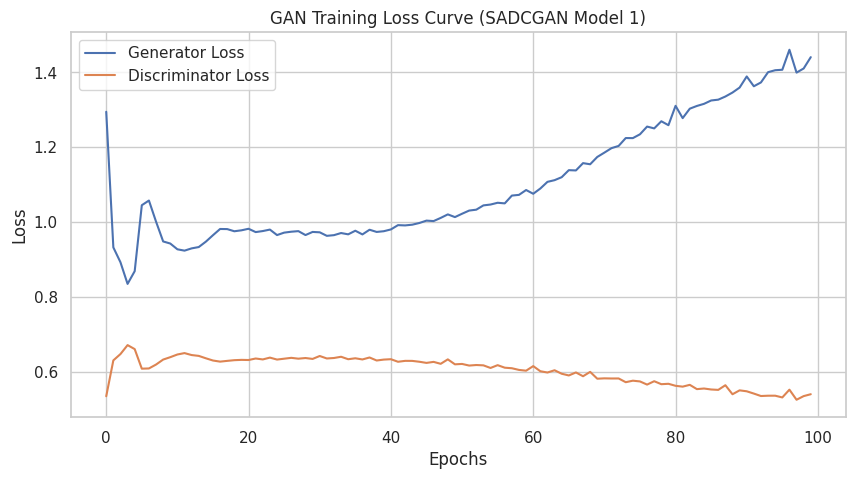

In [30]:
gan_history_2 = gan_2[0].history
generator = gan_2[1].generator  
gan_history_2['d_loss'] = [(real_loss + fake_loss) / 2 for real_loss, fake_loss in zip(gan_history_2['d_real_loss'], gan_history_2['d_fake_loss'])]
evaluator = Evaluation(generator, latent_dim, 512, 10000, 1024)
evaluator.plot_loss_curve(gan_history_2, title='GAN Training Loss Curve (SADCGAN Model 1)')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Discriminator loss
    - For the discriminator loss, it starts relatively low and mains around there
- Generator loss
    - For the generator loss, it increases with a spike and drops and proceeded to increase slowly


</div>

In [31]:
tf.keras.backend.clear_session()
K.clear_session()
scores1 = evaluator.compute_metrics(x_train)
print('FID Score:', scores1[0])
print('KID Score:', scores1[1])

None
313/313 [==============================] - 1s 3ms/step
FID Score: 50.28333886610312
KID Score: 0.03670983732172495


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- FID Score of 5-
- KID Score is 0.04
    
Did have a minor improvement over baseline dcgan 2

</div>

2/2 [==============================] - 3s 301ms/step


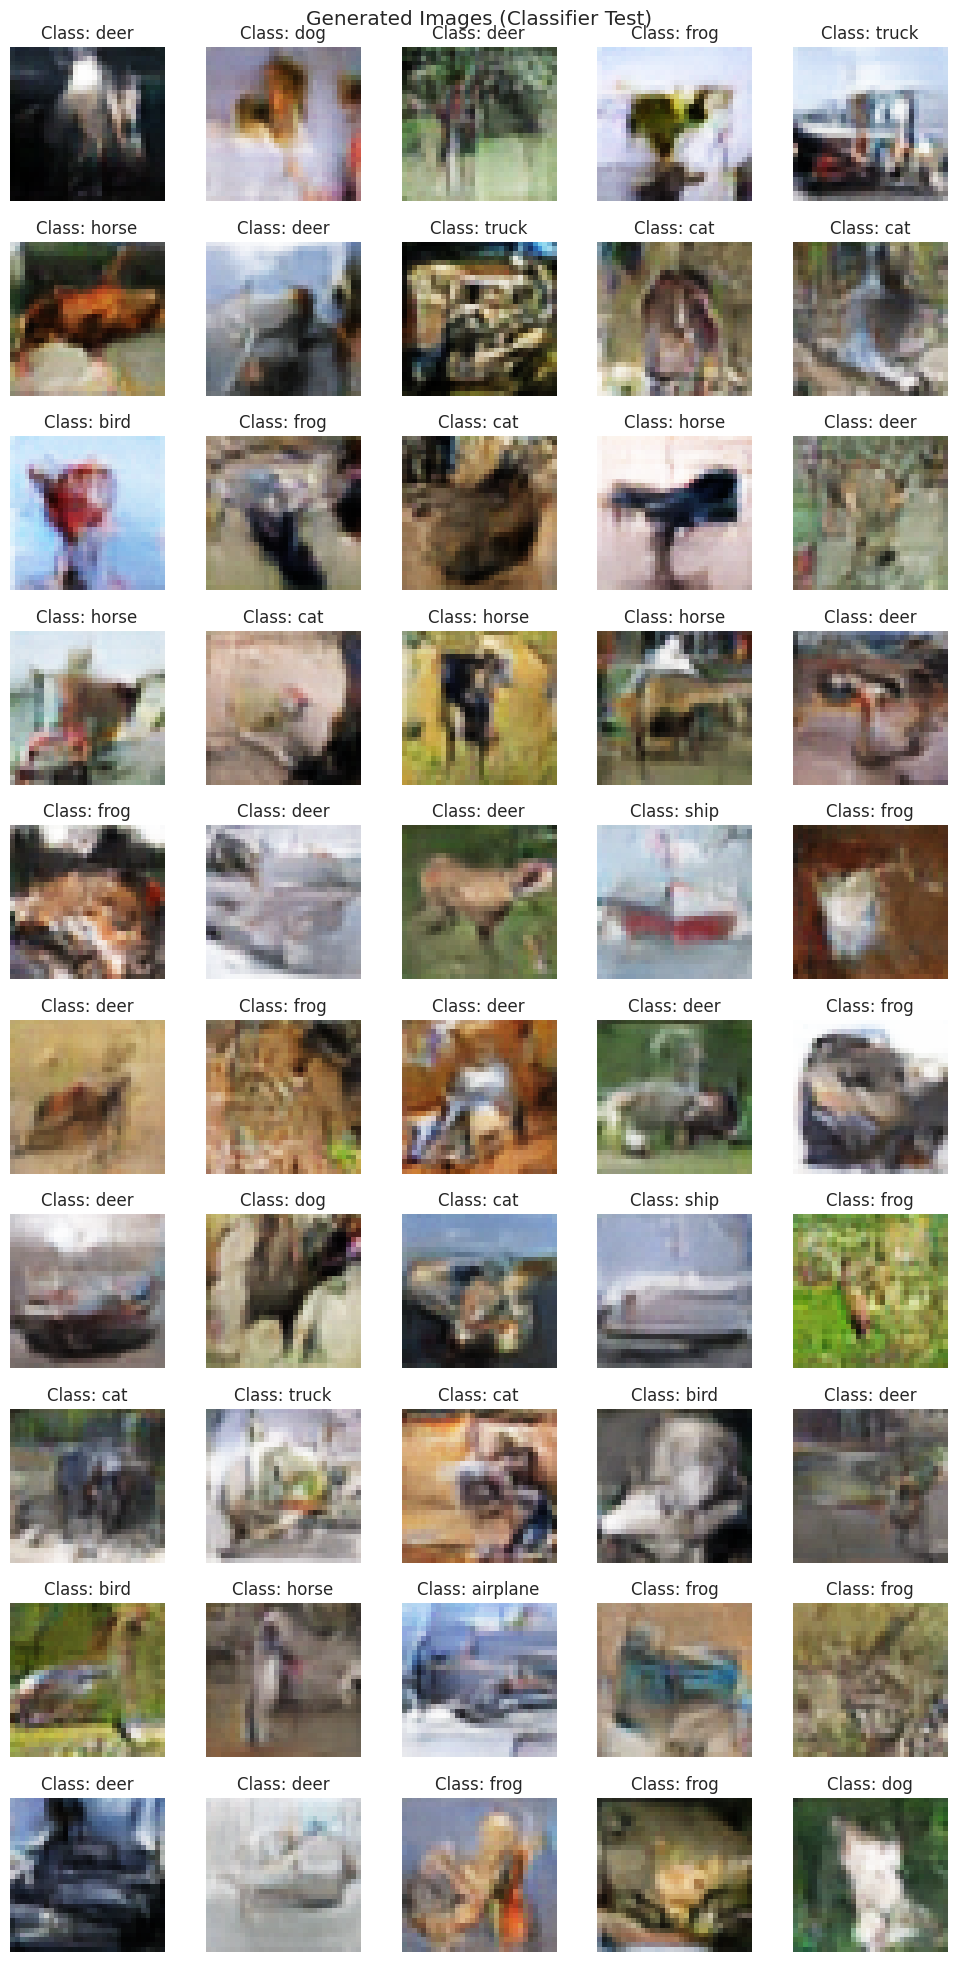

In [32]:
latent_dim = 128  
num_images = 50  
noise = tf.random.normal([num_images, latent_dim])
generated_images = generator.predict(noise)
generated_images = (generated_images + 1) / 2
generated_images = generated_images * 255
generated_images = np.clip(generated_images, 0, 255).astype('uint8')
generated_images_resized = tf.image.resize(generated_images, [224, 224]).numpy().astype('uint8')
predictions = model_c.predict(generated_images_resized)
predicted_classes = np.argmax(predictions, axis=-1)
num_columns = 5
num_rows = num_images // num_columns + (num_images % num_columns > 0)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2, num_rows * 2))
fig.suptitle('Generated Images (Classifier Test)')
for i, ax in enumerate(axes.flatten()):
    if i >= num_images:
        break
    ax.imshow(generated_images[i])
    ax.set_title(f'Class: {class_labels[predicted_classes[i]]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Similar to above, we can tell most of the animal images like deer,with some other classes alsop seem

</div>

#### Storing the scores

In [33]:
new_row = {'Model':'Baseline SADCGAN 1', 'FID':scores1[0], 'KID': scores1[1], 'd_loss':gan_history_2['d_loss'][-1], 'g_loss':gan_history_2['g_loss'][-1] }
new_df = pd.DataFrame([new_row])
full_scores = pd.concat([full_scores, new_df], ignore_index=True)
full_scores

Model        FID      KID   d_loss    g_loss
0  Baseline SADCGAN 1  50.283339  0.03671  0.53996  1.440854

### Second Model

##### Generator

__Key Difference__
1. Self attention layer added to both discriminator and generator

__Key Ideas__

1. **Input and Dense Layer**:
    - **Dense Layer**: 
        - **Units**: The layer has 4 * 4 * 512 units
        - **Input**: Takes an input of dimension `latent_dim` representing the latent space
        - **Kernel Initializer**: Utilizes `RandomNormal` with a standard deviation of 0.02 
2. **Reshape Layer**:
    - **New Shape**: Reshapes the output of the Dense layer into an 4x4x512 tensor.

3. **Normalization and Activation**:
    - **BatchNormalization**: 
    - **PreLu**:
4. **Transposed Convolution Layers**:
    - **Conv2DTranspose (First Layer)**:
        - **Filters**: 256
        - **Kernel Size**: 5x5
        - **Strides**: 2
        - **Padding**: 'same'

    - **Conv2DTranspose (Second Layer)**:
        - **Filters**: 128
        - **Kernel Size**: 5x5
        - **Strides**: 2
        - **Padding**: 'same'

    - **Conv2DTranspose (Third Layer)**:
        - **Filters**: 3 (corresponding to RGB channels)
        - **Kernel Size**: 5x5
        - **Strides**: 2
        - **Padding**: 'same'
        - **Activation**: 'tanh'


In [34]:
def build_generator(latent_dim):
    model = Sequential()
    # Foundation for 8x8 feature maps
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    # Upsample to 16x16
    model.add(UpSampling2D())
    model.add(SelfAttention(256))  
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # Upsample to 32x32
    model.add(UpSampling2D())
    model.add(SelfAttention(256))  
    model.add(Conv2D(3, (3,3), padding='same', activation='tanh'))
    return model


##### Discriminator
__Key Ideas__

1. **Input Layer and Convolutional Layers**:
    - **Conv2D (First Layer)**:
        - **Filters**: 64
        - **Kernel Size**: (3,3), captures spatial features.
        - **Strides**: (2,2),
        - **Padding**: 'same'
        - **Input Shape**: `in_shape` (the shape of the input images).
    - **LeakyReLU**:
        - **Alpha**: 0.2

    - **Conv2D (Second Layer)**:
        - **Filters**: 128
        - **Kernel Size**: (3,3)
        - **Strides**: (2,2),  reduces the spatial dimensions to half
        - **Padding**: 'same'
    - **LeakyReLU**:
        - **Alpha**: 0.2

2. **Flattening and Output Layer**:
    - **Flatten**: Transforms the 2D feature maps into a 1D feature vector, preparing it for the dense output layer.
    - **Dense**:
        - **Units**: 1, the output layer for binary classification.
        - **Activation**: 'sigmoid'



In [35]:
def build_discriminator(in_shape=(32, 32, 3)):
    model = Sequential()
    # Downsample to 16x16
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(SelfAttention(128))  
    # Downsample to 8x8
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(SelfAttention(64))  
    model.add(LeakyReLU(alpha=0.2))
    # Flatten and output layer
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model

#### Creating Checkpoint

In [36]:
callbacks = [ImageGenerationCallback(num_img=10, noise=128, vmin=-1, vmax=1), ModelCheckpointCallback(model_dir='baselineSADCGAN-2')]

#### Training

In [37]:
discriminator_dcgan3 = build_discriminator()
generator_dcgan3 = build_generator(128)

In [38]:
tf.keras.backend.clear_session()
K.clear_session()

Epoch 1/100
782/782 [==============================] - ETA: 0s - d_real_loss: 0.5980 - d_fake_loss: 0.7203 - g_loss: 0.7786 - d_acc: 0.6052 - d_realO: 0.4654 - d_fakeO: 0.5138

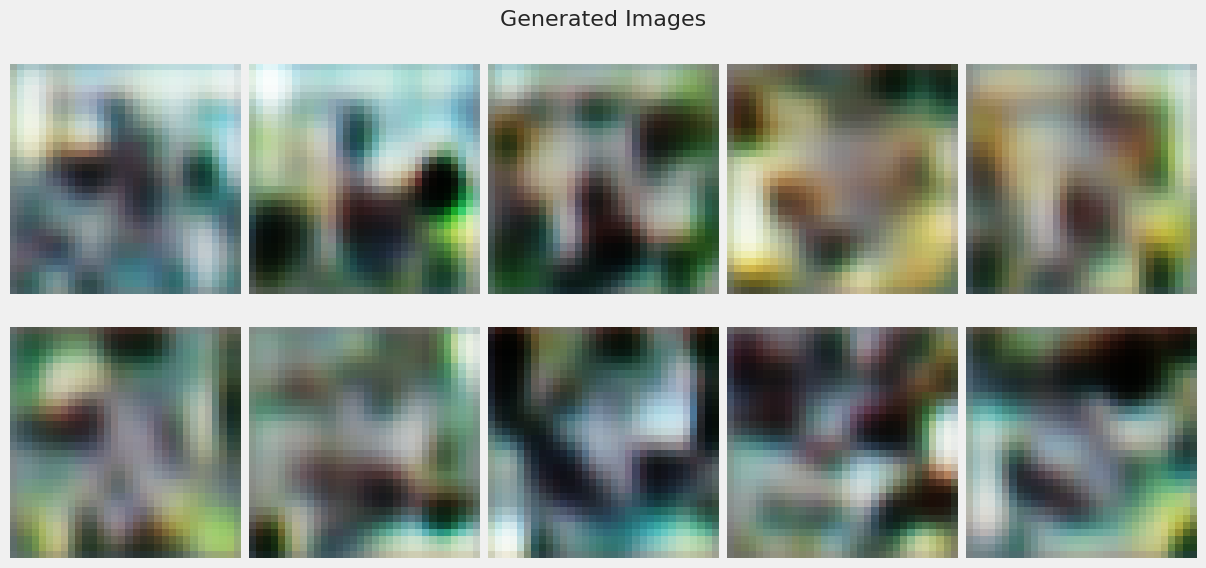

782/782 [==============================] - 17s 19ms/step - d_real_loss: 0.5980 - d_fake_loss: 0.7202 - g_loss: 0.7786 - d_acc: 0.6052 - d_realO: 0.4655 - d_fakeO: 0.5138
Epoch 2/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.7040 - d_fake_loss: 0.6767 - g_loss: 0.7345 - d_acc: 0.5203 - d_realO: 0.5016 - d_fakeO: 0.5061
Epoch 3/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6994 - d_fake_loss: 0.6827 - g_loss: 0.7218 - d_acc: 0.5180 - d_realO: 0.4987 - d_fakeO: 0.5032
Epoch 4/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6871 - d_fake_loss: 0.6934 - g_loss: 0.7243 - d_acc: 0.5383 - d_realO: 0.4974 - d_fakeO: 0.5029
Epoch 5/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6822 - d_fake_loss: 0.6991 - g_loss: 0.7035 - d_acc: 0.5339 - d_realO: 0.4950 - d_fakeO: 0.4985
Epoch 6/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6879 - d_fake_lo

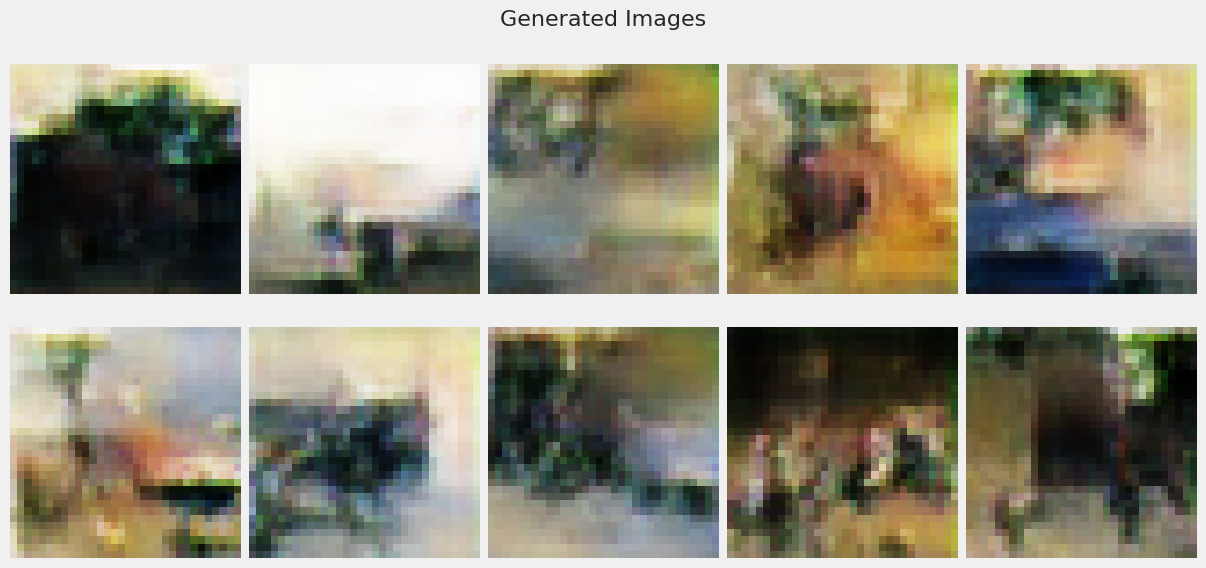

782/782 [==============================] - 14s 19ms/step - d_real_loss: 0.6879 - d_fake_loss: 0.6921 - g_loss: 0.7188 - d_acc: 0.5162 - d_realO: 0.4965 - d_fakeO: 0.5019
Epoch 12/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6857 - d_fake_loss: 0.6920 - g_loss: 0.7276 - d_acc: 0.5304 - d_realO: 0.4965 - d_fakeO: 0.5029
Epoch 13/100
782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.6895 - d_fake_loss: 0.6892 - g_loss: 0.7337 - d_acc: 0.5194 - d_realO: 0.4966 - d_fakeO: 0.5035
Epoch 14/100
782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.6907 - d_fake_loss: 0.6913 - g_loss: 0.7196 - d_acc: 0.5048 - d_realO: 0.4976 - d_fakeO: 0.5014
Epoch 15/100
782/782 [==============================] - 14s 19ms/step - d_real_loss: 0.6944 - d_fake_loss: 0.6920 - g_loss: 0.7141 - d_acc: 0.4907 - d_realO: 0.4997 - d_fakeO: 0.5008
Epoch 16/100
782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.6952 - d_fa

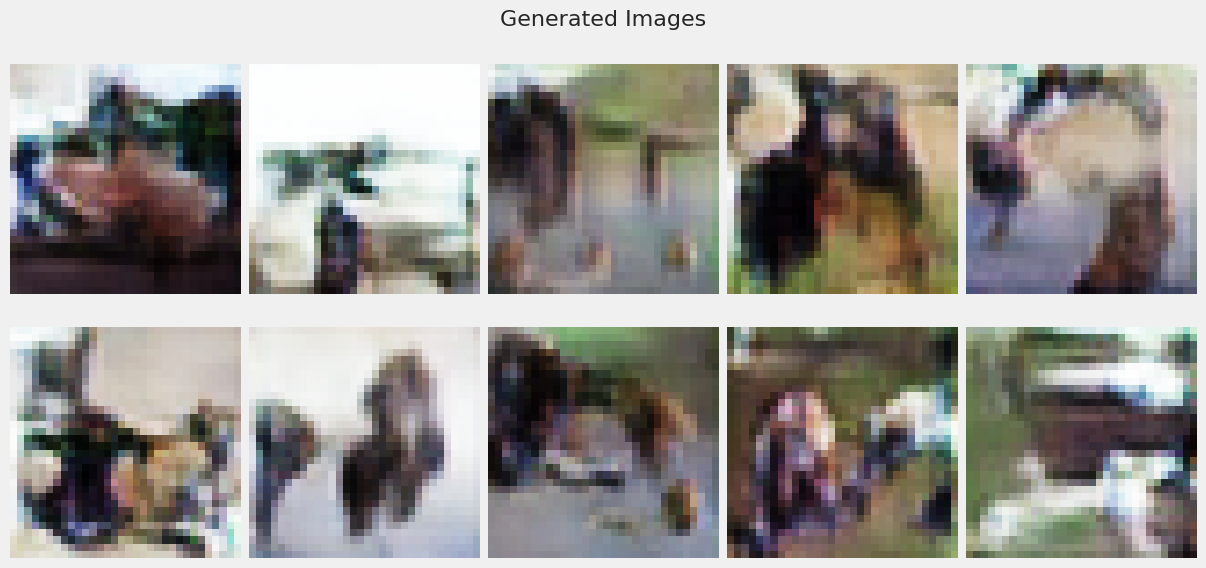

782/782 [==============================] - 12s 15ms/step - d_real_loss: 0.6910 - d_fake_loss: 0.6948 - g_loss: 0.7068 - d_acc: 0.4970 - d_realO: 0.4987 - d_fakeO: 0.4997
Epoch 22/100
782/782 [==============================] - 11s 14ms/step - d_real_loss: 0.6912 - d_fake_loss: 0.6942 - g_loss: 0.7093 - d_acc: 0.5020 - d_realO: 0.4988 - d_fakeO: 0.5001
Epoch 23/100
782/782 [==============================] - 13s 16ms/step - d_real_loss: 0.6920 - d_fake_loss: 0.6933 - g_loss: 0.7107 - d_acc: 0.5071 - d_realO: 0.4992 - d_fakeO: 0.5004
Epoch 24/100
782/782 [==============================] - 11s 14ms/step - d_real_loss: 0.6910 - d_fake_loss: 0.6925 - g_loss: 0.7091 - d_acc: 0.5118 - d_realO: 0.4984 - d_fakeO: 0.5005
Epoch 25/100
782/782 [==============================] - 11s 13ms/step - d_real_loss: 0.6907 - d_fake_loss: 0.6920 - g_loss: 0.7130 - d_acc: 0.5122 - d_realO: 0.4981 - d_fakeO: 0.5006
Epoch 26/100
782/782 [==============================] - 11s 13ms/step - d_real_loss: 0.6902 - d_fa

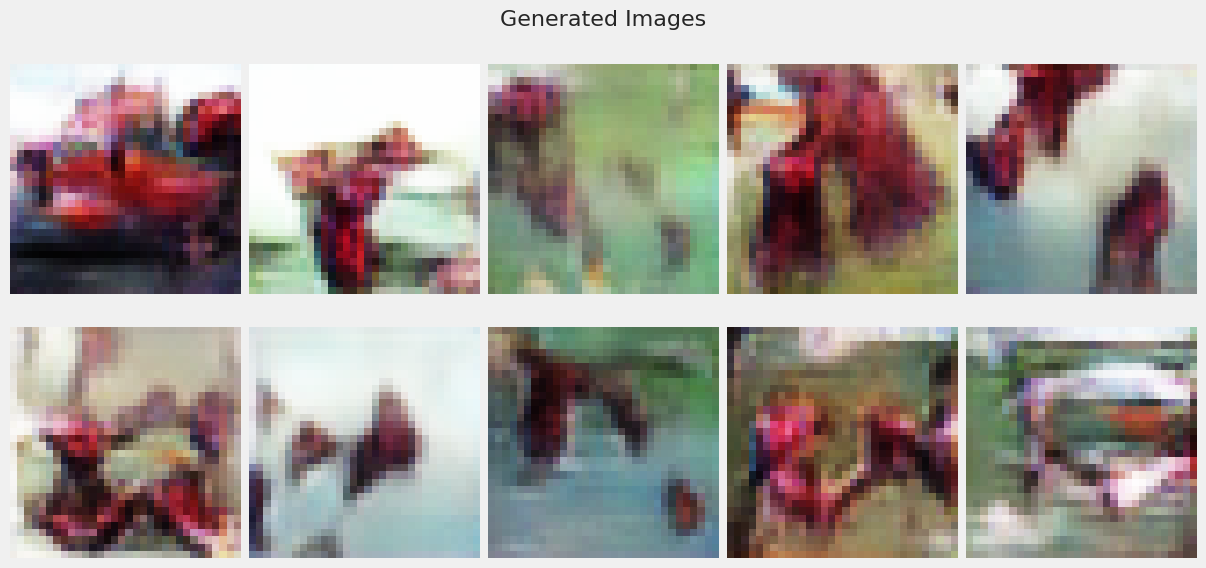

782/782 [==============================] - 12s 15ms/step - d_real_loss: 0.6909 - d_fake_loss: 0.6901 - g_loss: 0.7137 - d_acc: 0.5232 - d_realO: 0.4979 - d_fakeO: 0.5015
Epoch 32/100
782/782 [==============================] - 11s 13ms/step - d_real_loss: 0.6902 - d_fake_loss: 0.6915 - g_loss: 0.7180 - d_acc: 0.5144 - d_realO: 0.4984 - d_fakeO: 0.5020
Epoch 33/100
782/782 [==============================] - 11s 13ms/step - d_real_loss: 0.6908 - d_fake_loss: 0.6898 - g_loss: 0.7146 - d_acc: 0.5217 - d_realO: 0.4982 - d_fakeO: 0.5020
Epoch 34/100
782/782 [==============================] - 10s 13ms/step - d_real_loss: 0.6916 - d_fake_loss: 0.6885 - g_loss: 0.7157 - d_acc: 0.5229 - d_realO: 0.4982 - d_fakeO: 0.5022
Epoch 35/100
782/782 [==============================] - 11s 14ms/step - d_real_loss: 0.6903 - d_fake_loss: 0.6908 - g_loss: 0.7186 - d_acc: 0.5179 - d_realO: 0.4976 - d_fakeO: 0.5018
Epoch 36/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6902 - d_fa

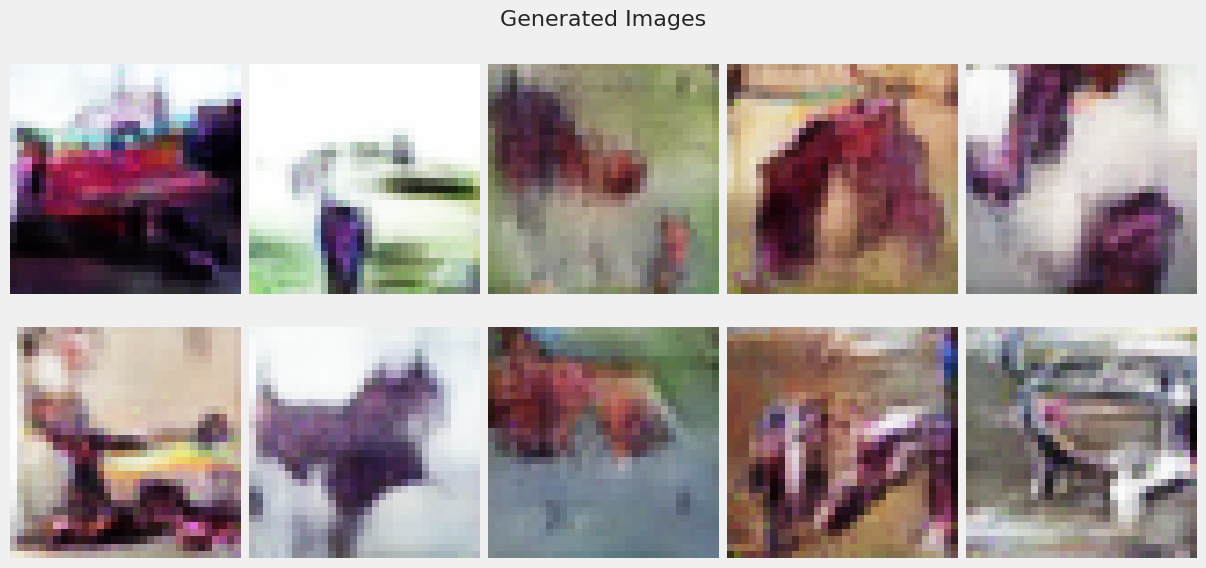

782/782 [==============================] - 15s 19ms/step - d_real_loss: 0.6884 - d_fake_loss: 0.6880 - g_loss: 0.7252 - d_acc: 0.5314 - d_realO: 0.4963 - d_fakeO: 0.5034
Epoch 42/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6881 - d_fake_loss: 0.6867 - g_loss: 0.7252 - d_acc: 0.5359 - d_realO: 0.4960 - d_fakeO: 0.5039
Epoch 43/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6860 - d_fake_loss: 0.6868 - g_loss: 0.7284 - d_acc: 0.5422 - d_realO: 0.4957 - d_fakeO: 0.5044
Epoch 44/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6859 - d_fake_loss: 0.6868 - g_loss: 0.7307 - d_acc: 0.5376 - d_realO: 0.4951 - d_fakeO: 0.5045
Epoch 45/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6856 - d_fake_loss: 0.6860 - g_loss: 0.7343 - d_acc: 0.5454 - d_realO: 0.4947 - d_fakeO: 0.5050
Epoch 46/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6852 - d_fa

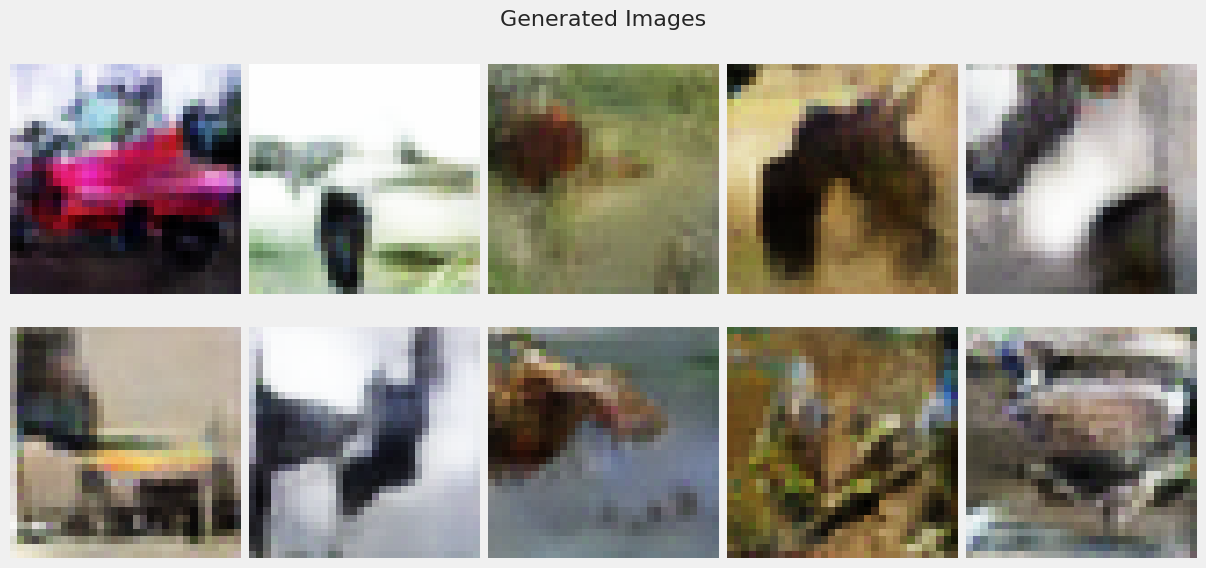

782/782 [==============================] - 15s 19ms/step - d_real_loss: 0.6823 - d_fake_loss: 0.6807 - g_loss: 0.7464 - d_acc: 0.5573 - d_realO: 0.4917 - d_fakeO: 0.5079
Epoch 52/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6821 - d_fake_loss: 0.6798 - g_loss: 0.7507 - d_acc: 0.5580 - d_realO: 0.4912 - d_fakeO: 0.5084
Epoch 53/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6810 - d_fake_loss: 0.6798 - g_loss: 0.7537 - d_acc: 0.5545 - d_realO: 0.4905 - d_fakeO: 0.5089
Epoch 54/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6811 - d_fake_loss: 0.6782 - g_loss: 0.7567 - d_acc: 0.5601 - d_realO: 0.4901 - d_fakeO: 0.5096
Epoch 55/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6800 - d_fake_loss: 0.6782 - g_loss: 0.7577 - d_acc: 0.5635 - d_realO: 0.4895 - d_fakeO: 0.5100
Epoch 56/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6791 - d_fa

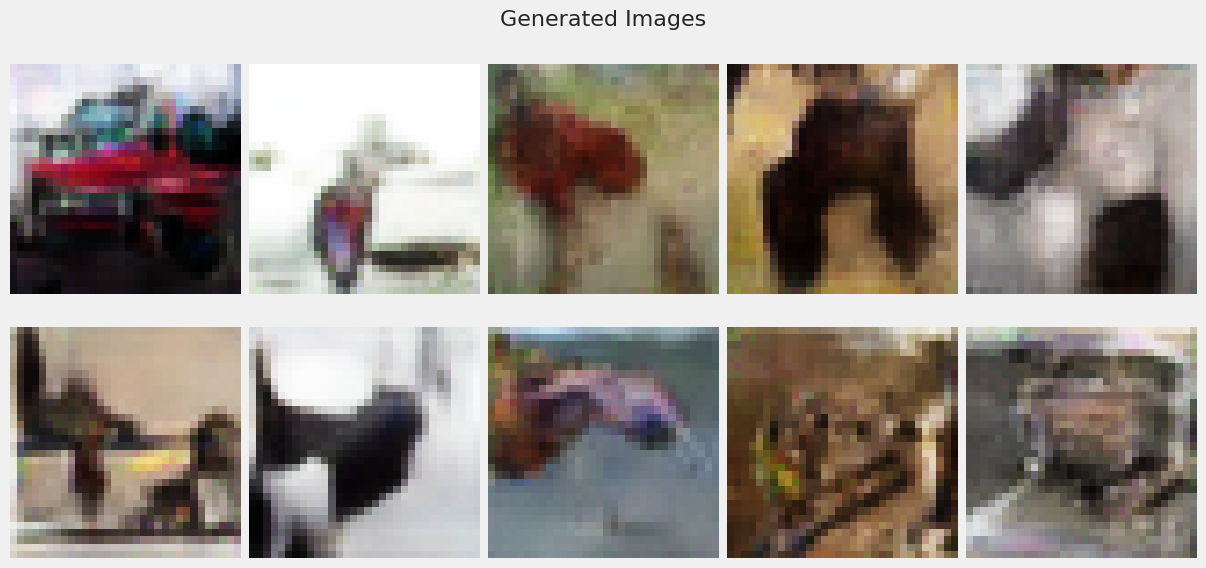

782/782 [==============================] - 14s 18ms/step - d_real_loss: 0.6768 - d_fake_loss: 0.6729 - g_loss: 0.7761 - d_acc: 0.5685 - d_realO: 0.4856 - d_fakeO: 0.5136
Epoch 62/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6767 - d_fake_loss: 0.6702 - g_loss: 0.7836 - d_acc: 0.5728 - d_realO: 0.4847 - d_fakeO: 0.5150
Epoch 63/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6750 - d_fake_loss: 0.6695 - g_loss: 0.7834 - d_acc: 0.5746 - d_realO: 0.4841 - d_fakeO: 0.5155
Epoch 64/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6738 - d_fake_loss: 0.6683 - g_loss: 0.7885 - d_acc: 0.5780 - d_realO: 0.4831 - d_fakeO: 0.5162
Epoch 65/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6736 - d_fake_loss: 0.6667 - g_loss: 0.7919 - d_acc: 0.5787 - d_realO: 0.4825 - d_fakeO: 0.5171
Epoch 66/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6733 - d_fa

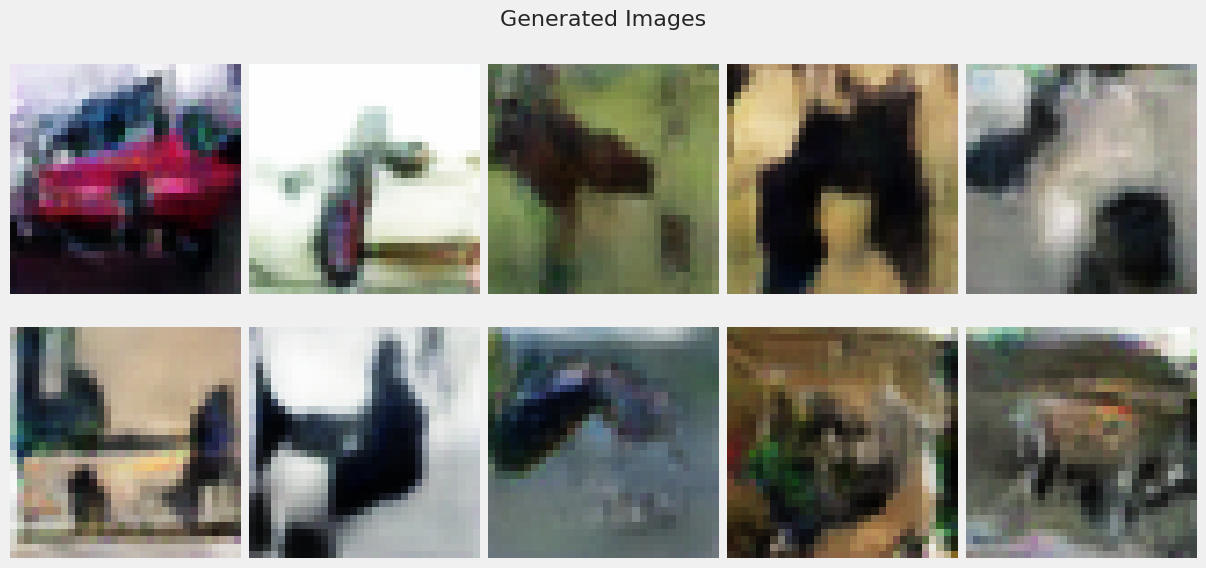

782/782 [==============================] - 15s 19ms/step - d_real_loss: 0.6704 - d_fake_loss: 0.6611 - g_loss: 0.8132 - d_acc: 0.5876 - d_realO: 0.4786 - d_fakeO: 0.5214
Epoch 72/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6703 - d_fake_loss: 0.6638 - g_loss: 0.8185 - d_acc: 0.5856 - d_realO: 0.4779 - d_fakeO: 0.5218
Epoch 73/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6679 - d_fake_loss: 0.6590 - g_loss: 0.8193 - d_acc: 0.5911 - d_realO: 0.4767 - d_fakeO: 0.5227
Epoch 74/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6679 - d_fake_loss: 0.6586 - g_loss: 0.8251 - d_acc: 0.5904 - d_realO: 0.4762 - d_fakeO: 0.5234
Epoch 75/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6674 - d_fake_loss: 0.6556 - g_loss: 0.8268 - d_acc: 0.5951 - d_realO: 0.4759 - d_fakeO: 0.5241
Epoch 76/100
782/782 [==============================] - 14s 17ms/step - d_real_loss: 0.6657 - d_fa

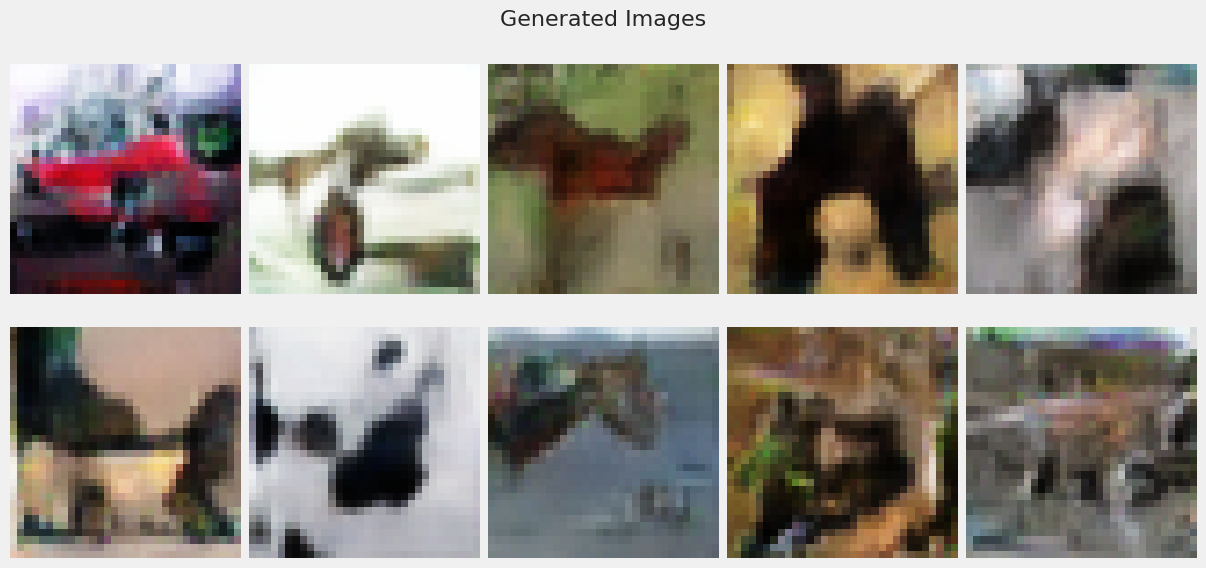

782/782 [==============================] - 15s 19ms/step - d_real_loss: 0.6635 - d_fake_loss: 0.6502 - g_loss: 0.8480 - d_acc: 0.6010 - d_realO: 0.4712 - d_fakeO: 0.5284
Epoch 82/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6618 - d_fake_loss: 0.6497 - g_loss: 0.8539 - d_acc: 0.6018 - d_realO: 0.4700 - d_fakeO: 0.5296
Epoch 83/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6625 - d_fake_loss: 0.6487 - g_loss: 0.8552 - d_acc: 0.6026 - d_realO: 0.4700 - d_fakeO: 0.5299
Epoch 84/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6614 - d_fake_loss: 0.6485 - g_loss: 0.8551 - d_acc: 0.6017 - d_realO: 0.4691 - d_fakeO: 0.5303
Epoch 85/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6619 - d_fake_loss: 0.6461 - g_loss: 0.8629 - d_acc: 0.6054 - d_realO: 0.4683 - d_fakeO: 0.5315
Epoch 86/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6598 - d_fa

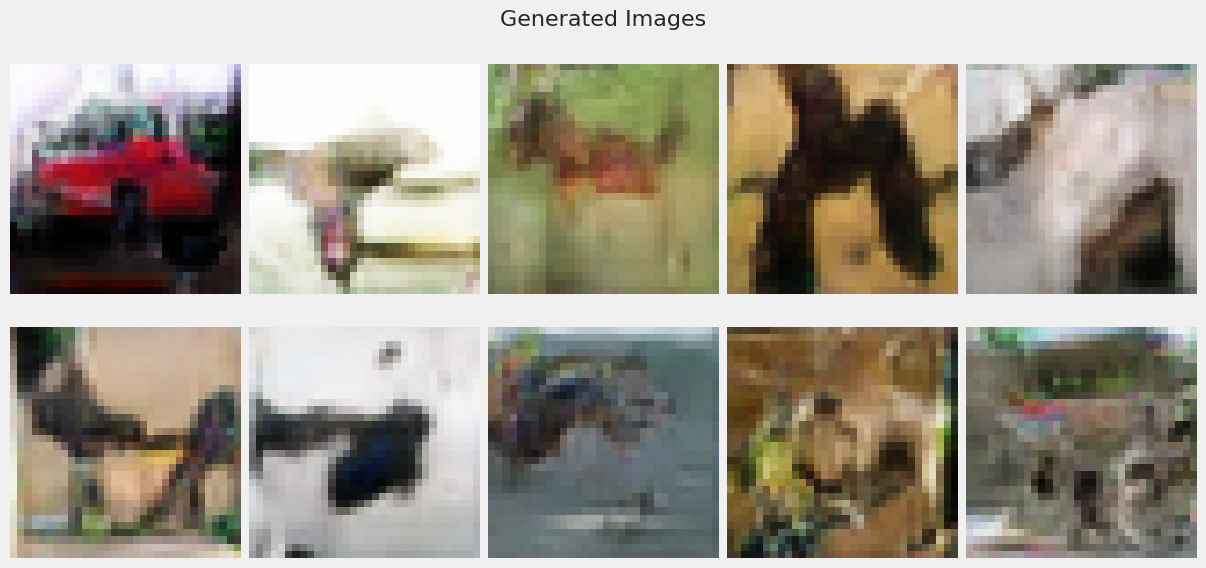

782/782 [==============================] - 15s 19ms/step - d_real_loss: 0.6545 - d_fake_loss: 0.6354 - g_loss: 0.8907 - d_acc: 0.6175 - d_realO: 0.4614 - d_fakeO: 0.5383
Epoch 92/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6525 - d_fake_loss: 0.6357 - g_loss: 0.8967 - d_acc: 0.6195 - d_realO: 0.4604 - d_fakeO: 0.5391
Epoch 93/100
782/782 [==============================] - 14s 17ms/step - d_real_loss: 0.6543 - d_fake_loss: 0.6355 - g_loss: 0.8953 - d_acc: 0.6227 - d_realO: 0.4599 - d_fakeO: 0.5395
Epoch 94/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6521 - d_fake_loss: 0.6320 - g_loss: 0.9038 - d_acc: 0.6230 - d_realO: 0.4585 - d_fakeO: 0.5411
Epoch 95/100
782/782 [==============================] - 14s 17ms/step - d_real_loss: 0.6498 - d_fake_loss: 0.6309 - g_loss: 0.9065 - d_acc: 0.6261 - d_realO: 0.4579 - d_fakeO: 0.5417
Epoch 96/100
782/782 [==============================] - 13s 17ms/step - d_real_loss: 0.6501 - d_fa

In [39]:
gan_3 = train_gan(discriminator_dcgan3, generator_dcgan3, noise, 'Baseline SADCGAN 2', dataset, 100, callbacks=callbacks)

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Looking at the accuracy, we can see that the discriminator ended with a  6595% accuracy while it may not be the best, it did show that it is not able to fully determine real and fake as it started from 0.6
- No Model Collapse


</div>

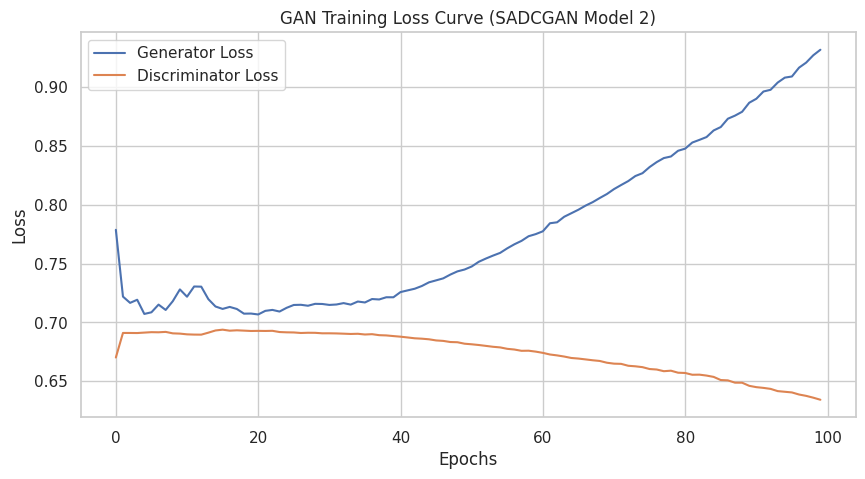

In [40]:
gan_history_3 = gan_3[0].history
generator = gan_3[1].generator  
gan_history_3['d_loss'] = [(real_loss + fake_loss) / 2 for real_loss, fake_loss in zip(gan_history_3['d_real_loss'], gan_history_3['d_fake_loss'])]
evaluator = Evaluation(generator, latent_dim, 512, 10000, 1024)
evaluator.plot_loss_curve(gan_history_3, title='GAN Training Loss Curve (SADCGAN Model 2)')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Discriminator loss
    - For the discriminator loss, it starts relatively low and rises quickly and continues to increase steadily as the epochs increases
- Generator loss
    - For the generator loss, it drops and proceeded to increase slowly


</div>

In [41]:
tf.keras.backend.clear_session()
K.clear_session()
scores1 = evaluator.compute_metrics(x_train)
print('FID Score:', scores1[0])
print('KID Score:', scores1[1])

None
313/313 [==============================] - 1s 3ms/step
FID Score: 49.59507667915321
KID Score: 0.03258219687378716


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- FID Score of 49
- KID Score is 0.047
    
It did not improve too much
</div>

2/2 [==============================] - 1s 24ms/step


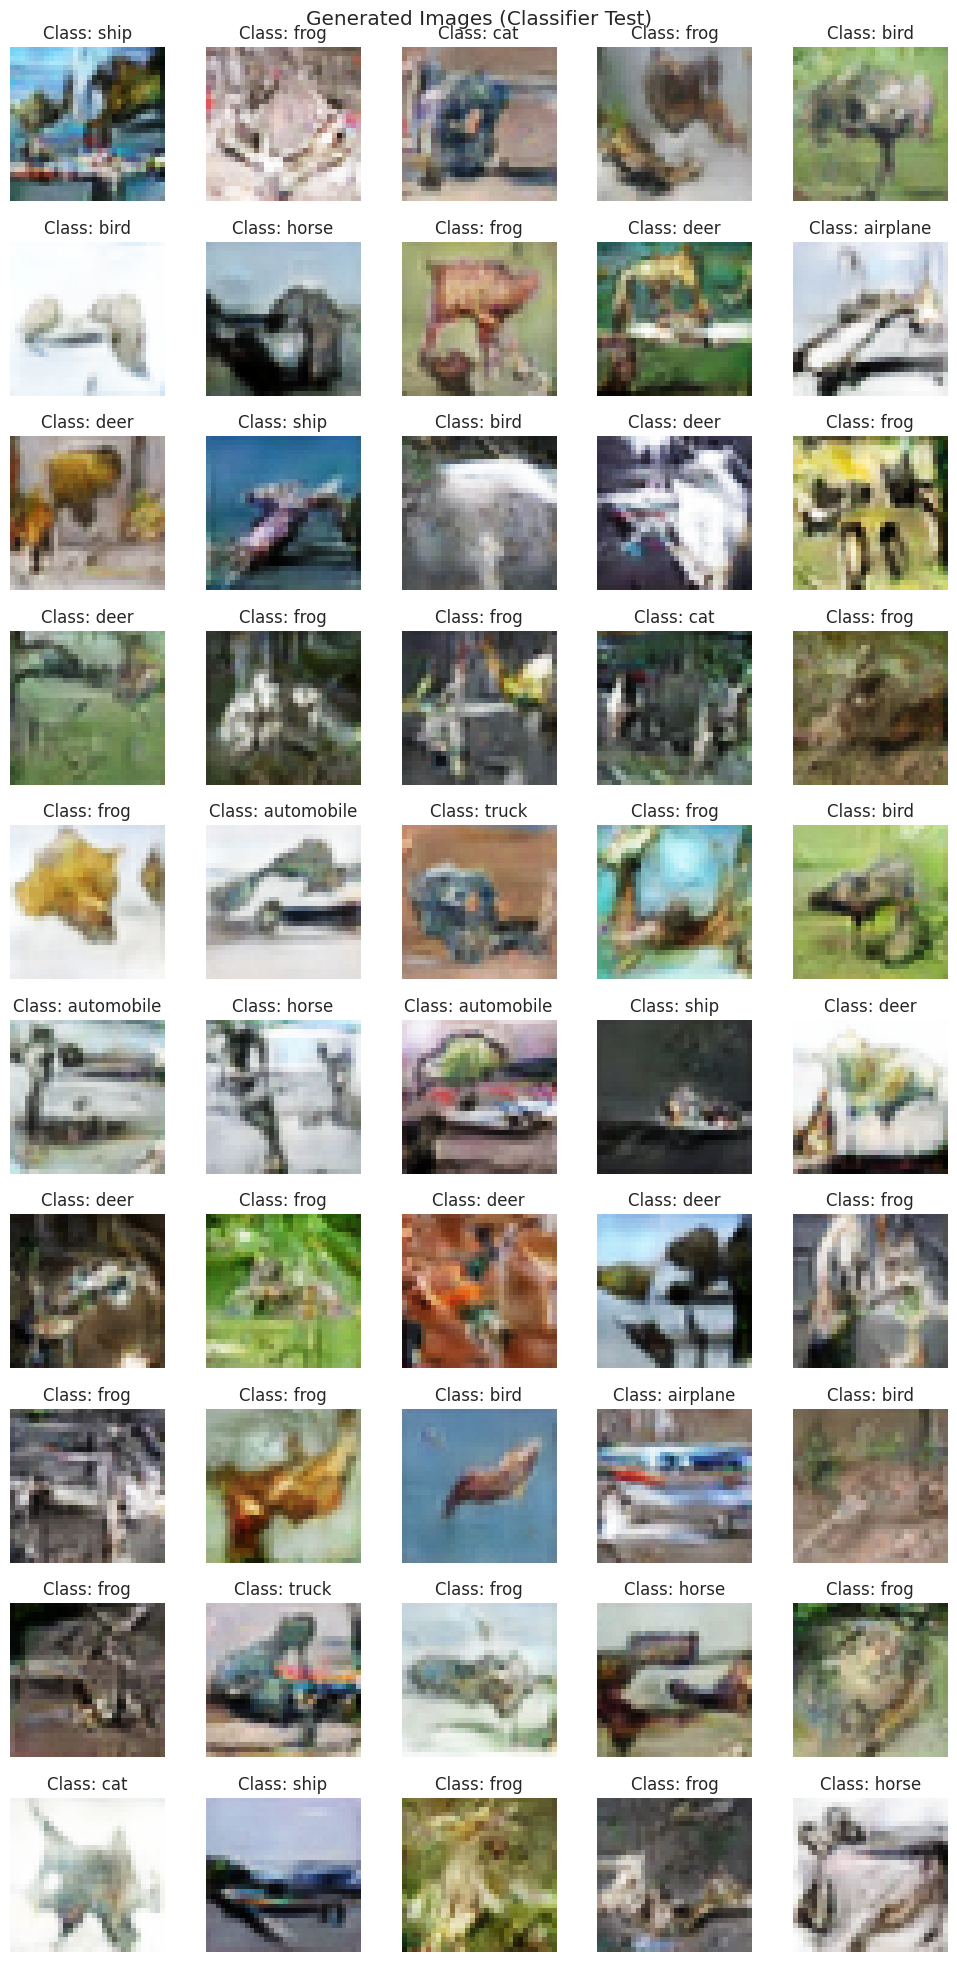

In [42]:
latent_dim = 128  
num_images = 50  
noise = tf.random.normal([num_images, latent_dim])
generated_images = generator.predict(noise)
generated_images = (generated_images + 1) / 2
generated_images = generated_images * 255
generated_images = np.clip(generated_images, 0, 255).astype('uint8')
generated_images_resized = tf.image.resize(generated_images, [224, 224]).numpy().astype('uint8')
predictions = model_c.predict(generated_images_resized)
predicted_classes = np.argmax(predictions, axis=-1)
num_columns = 5
num_rows = num_images // num_columns + (num_images % num_columns > 0)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2, num_rows * 2))
fig.suptitle('Generated Images (Classifier Test)')
for i, ax in enumerate(axes.flatten()):
    if i >= num_images:
        break
    ax.imshow(generated_images[i])
    ax.set_title(f'Class: {class_labels[predicted_classes[i]]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Generally, we can tell most of the animal images like deer, dog

</div>

#### Storing the scores

In [43]:
new_row = {'Model':'Baseline SADCGAN 2', 'FID':scores1[0], 'KID': scores1[1], 'd_loss':gan_history_3['d_loss'][-1], 'g_loss':gan_history_3['g_loss'][-1] }
new_df = pd.DataFrame([new_row])
full_scores = pd.concat([full_scores, new_df], ignore_index=True)
full_scores

Model        FID       KID    d_loss    g_loss
0  Baseline SADCGAN 1  50.283339  0.036710  0.539960  1.440854
1  Baseline SADCGAN 2  49.595077  0.032582  0.634288  0.931837

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Baseline Model (Self Attention CGAN)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


### Store All Results

In [44]:
full_scores.to_csv('full_scores5.csv')